In [1]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
import pandas as pd
import re
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LG그램\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LG그램\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
since = input("since(2021-06-21) : ")
until = input("until(2021-06-21) : ")

since(2021-06-21) : 2021-06-09
until(2021-06-21) : 2021-06-12


In [6]:
import twint
c = twint.Config()
c.Search = 'tesla'
c.Limit = 10000
c.Since=since
c.Until = until
c.Output = 'Tesla_Tweet.csv'
c.Pandas = True
twint.run.Search(c)

1403502284361932800 2021-06-12 08:59:55 +0900 <ChrisNalley7> @Investments_CEO If only dogecoin were more than just if. Always if questions from everyone. Doge is destined for greatness, get the if out your mouths. WHEN tesla accepts, WHEN coinbase wakes up. WHEN the doubters say shoulda woulda could. Then don't ask just DO.
1403502273557417986 2021-06-12 08:59:52 +0900 <mentalbrethmint> @SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113 @tesla_johnny  https://t.co/G3PArwugR0
1403502270126428167 2021-06-12 08:59:51 +0900 <Jason_lloydd> @Starbuk99 @WilliamRoark17 @Teslarati @Tesla Bro I’m more of a blue collar worker than you’ll ever be. You lost that battle real quick. I don’t even need to know what you do to gaurentee that my hands get dirtier doing a much cooler job, probably for better wages 💁🏻‍♂️ also majority of truck buyers don’t work on farms 😂
1403502258617257986 2021-06-12 08:59:48 +0900 <thaynacrissilva> Tesla tudo que eu faço essa droga de cena detesta
1403502246818635776 2021-06

1403501213337915392 2021-06-12 08:55:39 +0900 <Florin23220449> @DefaulteDedsec @TeslaOwnersNBay @Tesla @elonmusk It’s gonna be cheaper someday  It’s pretty dang expensive to build a Tesla yk? In a couple of years it’s gonna be fine  This is only the beginning
1403501201023406085 2021-06-12 08:55:36 +0900 <tlr_tamara77> @greg16676935420 @Tesla @SlimJim @elonmusk you need to see this 🤣🤣
1403501177292029954 2021-06-12 08:55:31 +0900 <Kitty27485198> @Mrio64118567 @LloydOstertagg @JantieWillie @Tesla @elonmusk This won't age well
1403501171935899650 2021-06-12 08:55:29 +0900 <Nahoko12q> @tesla_kyoto 本当にひびきさんの仰る通りです😃
1403501151765606404 2021-06-12 08:55:25 +0900 <onlyfandz> Rich people just do anything. Kim kardashian got a tesla wrapped in sheeps wool like its not 110 degrees outside
1403501103149420545 2021-06-12 08:55:13 +0900 <PierreCarrier1> @tesla_raj @Tesla This cannot be the battery the give the range of the car... damn it so small
1403501096304189442 2021-06-12 08:55:11 +0900 <kpkiw

1403500833589837824 2021-06-12 08:54:09 +0900 <Lahnamal> @awatefh1 @XfaisalhamadX @osamah32568005 @U4h9BdtnyzT05JL @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @mohammedabdo140 @kkhaled_fathy @v1LNNnRW4iWaTcG @hamadamosbahya2 @8Ue5vbFp2a7vlfs @ksa8739 @LVYdkXNbBewlYRl @cDi5TTNDsoKtOKt @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @AlquwayfiliM @WaladRwsh2020 @abosoade65861ma @sari26608507 @tG9uX9LN2a4VZ58 @safyaljhwary @Mervat44594894 والباقيات الصالحات خير عند ربك ثوابا وخير املا
1403500826295930887 2021-06-12 08:54:07 +0900 <lama842a> @N_Tesla_N_3_6_9 عند غيري فرص
1403500824718757892 2021-06-12 08:54:07 +0900 <lisa_uno6> If this Tesla wanna drive

1403500054313320453 2021-06-12 08:51:03 +0900 <IheartTesla> Who needs the thrill of a roller coaster? Just drive a @Tesla Model S Plaid, and have your mind blown. 💥
1403500048877490186 2021-06-12 08:51:02 +0900 <kylecoolky> @George66170467 @nikkidoescrypto @dorsetphoto_JLP @SuperSaf @elonmusk @Tesla Tesla has track mode where they reduce it but normally, they’re there making sure you’re safe. Starting to fishtail after a failed launch? They can stop the fishtailing almost immediately. Teslas have better wheel control overall, monitoring everything over 1000 times a second.
1403500044003672071 2021-06-12 08:51:00 +0900 <cartier_jenner> Poll time: If Elon Musk did not tweet anything supportive of Doge or Tesla did not accept Doge coin by June 30th 2021. Would you sell your Doge coin
1403500023040643075 2021-06-12 08:50:55 +0900 <Lahnamal> @awatefh1 @8Ue5vbFp2a7vlfs @mohammedabdo140 @6eromair @XfaisalhamadX @aboshthaaa @v1LNNnRW4iWaTcG @U4h9BdtnyzT05JL @cDi5TTNDsoKtOKt @fodiifhd @osamah32

1403498852615872512 2021-06-12 08:46:16 +0900 <wolfe_saint> @Tesla Yo. Solar out. Tech came and it’s back out again. Been down for 1.5 weeks. What’s going on?!??!???  All good for almost 3 years until this week.
1403498836992180228 2021-06-12 08:46:13 +0900 <conniesmiles> @tesla_johnny Indeed
1403498828494376966 2021-06-12 08:46:11 +0900 <edchia> @DMC_Ryan @elonmusk @Tesla @_hussainbolt @samim229 @SamiSosaaaa @jassyaujla
1403498827324219398 2021-06-12 08:46:10 +0900 <Hein_The_Slayer> @TeslaPhx @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper @notjustplanetA Fiat Multipla…👀
1403498795065872384 2021-06-12 08:46:03 +0900 <FinlayPacks> @BrandonRZV @kylecoolky @lajzeli1 @SuperSaf @elonmusk @Tesla saftey, reliability, repairs, self driving, comfort? mass production???
1403498788153479168 2021-06-12 08:46:01 +0900 <BerdyLittle> @CalcagnoJohndj @EvaFoxU @Tesla @elonmusk Some genius will bottle’s elon’s sweat. Mass produce the stank and brand i

1403497351667326978 2021-06-12 08:40:19 +0900 <anachronofspace> @greg16676935420 @Tesla @SlimJim plaid cybertruck can probably tow a whole box
1403497302388469764 2021-06-12 08:40:07 +0900 <BlueSky_PSO2> @Tesla_pso2 JKだからわからない(,,・ω・)
1403497291193880576 2021-06-12 08:40:04 +0900 <WhatNarrative> @bakedbiscuit20 @danny_in_miami @edmunds @FordMustang @Tesla  https://t.co/gGRx2IE62K   https://t.co/a9b4rS7qAy  Build quality my ass
1403497288345944072 2021-06-12 08:40:03 +0900 <Numenor33> @TeslaPhx @Thunder7ga @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper @notjustplanetA I love Cashews, but hate Cashew Butter, so I understand
1403497283421982723 2021-06-12 08:40:02 +0900 <Quotenet> Nieuwste Tesla Model S Plaid zit vol beloftes: ‘Sneller dan een Porsche, veiliger dan een Volvo’  https://t.co/4yQ9mDOLuL  https://t.co/tbplQY7muO
1403497268674805765 2021-06-12 08:39:59 +0900 <isaiahmlouis> @jtmellas @SANUKAdeTEKA @SuperSaf @elonmusk @Tesla Be

1403495867651432448 2021-06-12 08:34:25 +0900 <TerryBassGuitar> @SuperSaf @elonmusk @Tesla 1.99 seconds. That'll be great in the downtown areas! Why don't they spend R &amp; D money on that supposed 1000 mile battery.
1403495828640120837 2021-06-12 08:34:15 +0900 <C_Doshoian> @JohnnaCrider1 Doesn't hurt that he has 140 million shares of Tesla lol.   If they hit 2 grand a share he will be worth 280 billion dollars.  I cant wait to have billions of shares from companies lol.  https://t.co/UEcu0mj2kS
1403495820259909636 2021-06-12 08:34:13 +0900 <TeslaHype> Tesla Plaid Event Recap   https://t.co/QDocGBvIDV  @NYKChannel
1403495819475566593 2021-06-12 08:34:13 +0900 <agusnox> @ValueExpected @lorakolodny @russ1mitchell NHSTA - National highway Saftey Tesla Association
1403495815730106369 2021-06-12 08:34:12 +0900 <Misohokneee> @tesla_raj @teslaownersSV I spy 31 $DOGE
1403495799510601728 2021-06-12 08:34:08 +0900 <RubixRufus> @deekw2 @ScoutManTalk @ClimatoDan @Toyota @Tesla @ToyotaMotorCorp N

1403494747566755840 2021-06-12 08:29:58 +0900 <tiredmasriya> duqa tesla &gt; nikola tesla
1403494746417352708 2021-06-12 08:29:57 +0900 <B1kesRule> @TeslaChillMode @Tesla Sounds like Nema TT-30. Tesla doesn't make an adapter for TT-30, but EVSE Adapters does, and it's got all the same safety features as the Tesla adapters. It's backordered, expected June 23. If that's not soon enough, I'd try to borrow one.  https://t.co/sEtBTqswpN
1403494716457598983 2021-06-12 08:29:50 +0900 <WingerTheBand> #MonstersOnTheMountain tickets available NOW!  https://t.co/bD0r125Bt5  See you there! #Winger #WingerTheBand #WingerBand #KipWinger #RebBeach #RodMorgenstein #PaulTaylor #JohnRoth #Tesla #FireHouse #VinceNeil #Slaughter #Vixen #GeorgeLynch #BulletBoys #Eclipse #NightRanger #KIX  https://t.co/SO7c8uARzW
1403494715241103360 2021-06-12 08:29:50 +0900 <DobackhuffCFO> @abel68702463 That’s good. PS:  Tesla is dead money at these levels. Way easier money to be made.
1403494679056769025 2021-06-12 08:29:

1403493565871820804 2021-06-12 08:25:16 +0900 <_13820> accedió a archivos secretos del Servicio Interno d Impuestos d los Estados Unidos(IRS)q muestran cómo multimillonarios como Jeff Bezos (fundador de Amazon),Elon Musk (Tesla y SpaceX) y Warren Buffet (inversor y experto en la bolsa) pagan casi nada d imp d renta sobre sus fortunas
1403493513870950402 2021-06-12 08:25:04 +0900 <jrdztweets> I just tweeted this from my Tesla. #autopilot
1403493509265567744 2021-06-12 08:25:02 +0900 <Eturnquest> I am so glad I had my Tesla obsession in 2012 when I naively thought it could change the world
1403493499400462337 2021-06-12 08:25:00 +0900 <droid2fan> @Ricknoname @Mod3My @AndruEdwards @Tesla @elonmusk For like 35 min
1403493469809696771 2021-06-12 08:24:53 +0900 <jpyII> @ThinkFab Are they seriously going after access to the Tesla Supercharger network?
1403493454039056384 2021-06-12 08:24:49 +0900 <AndreiBulu> @teslamaniacs @xDreamCoding @tesla_raj 4s means 4 cells in series, about 12-13V. 1P 

1403492249875320835 2021-06-12 08:20:02 +0900 <Danielgmiller3> @elonmusk @teslaownersSV Every dog on the block is going to want to test the power of a @Tesla Roadster @elonmusk  https://t.co/viVp5GnJOX
1403492209383690241 2021-06-12 08:19:52 +0900 <SocialMedia_Car> Could Tesla Really Have Over One Million Cybertruck Pre-Orders?  https://t.co/cmHHK27VKa #EV #VE #MOBILITY #NewMobility
1403492201510936578 2021-06-12 08:19:51 +0900 <Neo21325164> @beittatt @BillyM2k @Tesla It will be in Tesla’s April 1st ideas.
1403492184003911683 2021-06-12 08:19:46 +0900 <KryptoPunkz> @AdrianStarr108 @elonmusk @Tesla @undergroundraci I’m glad we are on the same wave length 🤟🏽 Colour? I’m a sucker for baby blue. I feel like you’d need to experience Europe for an SVJ, and because the pricing is a lot more attractive 😂
1403492180543651845 2021-06-12 08:19:46 +0900 <Dylan_Alton> I know we’re trying to live on the moon and everything @elonmusk but I think it’s about time you create a Tesla formula 1 car #justs

1403490069776945155 2021-06-12 08:11:22 +0900 <bednarz42> @TeslaOwnersNBay @Tesla @elonmusk This isn’t new, people asked for waypoints last year and he said ok.  Still ain’t here.
1403490055960862723 2021-06-12 08:11:19 +0900 <AlejoM_Toro> @TeslaOwnersNBay @Tesla @elonmusk Now all we need to do is wait two weeks…
1403490049577132032 2021-06-12 08:11:18 +0900 <_MASH_D> The Top Five Cars With The Lowest Overall Probability Of Injury In A Crash Are Tesla’s
1403490041540665346 2021-06-12 08:11:16 +0900 <iAmAPaidShill> Ya, most of the “Tesla doesn’t need a PR team” people think PR is just about planting fake stories with media and “fighting FUD.” Strategic communications could really help Tesla get the story THEY WANT out there.
1403490038474850308 2021-06-12 08:11:15 +0900 <KerenthePAS> @dajjrambo Right! Rent going up because Tesla and all these big companies moving here. Columbus bout to get even more congested
1403490027552841740 2021-06-12 08:11:12 +0900 <scidood> @chente_chente1 A seco

1403489155758313476 2021-06-12 08:07:44 +0900 <oophus> @varbmos Nope. Motors and gearboxes are manufactored and put together to hit certain sweetspots. Tesla just do good at low speeds. Other EV's catch up at faster speeds. Meaning they are developed to be most optimum at highway speeds, while Tesla focus on WLTP/EPA average speeds.
1403489154223255556 2021-06-12 08:07:44 +0900 <nikkidoescrypto> @kylecoolky @dorsetphoto_JLP @SuperSaf @elonmusk @Tesla I’d you don’t change gears the car is driving itself. So yeah I’ll compare them.
1403489139471831051 2021-06-12 08:07:41 +0900 <bakedbiscuit20> @WESanborn @Tsutsaev_Ruslan @_FlipMan @edmunds @FordMustang @Tesla Correct. any source that criticizes Tesla apparently hates Tesla or is paid for by Ford lmao Tesla fanboys aren't EV fans. They're just Tesla cultists that hate to see other EVs succeed or do better than Tesla.
1403489125022552064 2021-06-12 08:07:37 +0900 <DONTUMOVE> ⠀⠀⠀⠀⠀⠀⠀⠀               I may have a cute voice but Tesla said he 

1403488373159825408 2021-06-12 08:04:38 +0900 <C10318D> @tesla_boy_jp 注文からどれくらい待ったんですか？！
1403488353249640457 2021-06-12 08:04:33 +0900 <Reee_haaa_mmm> I’ve had this car for a while now and why did I just discover that it’ll steer itself bitch I got an offbrand tesla
1403488343724339201 2021-06-12 08:04:31 +0900 <Dyl75936523> @WillFealey @Tesla @elonmusk You did it mate. The X too!
1403488342939901956 2021-06-12 08:04:31 +0900 <TeslaChillMode> @thatt3slaguy @Tesla @elonmusk @TeslaOwnersEBay @SeasonedTech @tesla_m3friday @TeslaFrunk @TonyTesla4Life @CodingMark @MFrunker @SjvTesla @TeslaOwnersNBay I’m fine with oem
1403488335369281537 2021-06-12 08:04:29 +0900 <NMinakhi> @Teslarati @klwtts Elon was wearing a cool leather jacket with Plaid symbol, are they available to buy from Tesla?
1403488286824230915 2021-06-12 08:04:17 +0900 <stojacic> how many bitches can we fit in the tesla @elonmusk?
1403488231182700546 2021-06-12 08:04:04 +0900 <PromoteHumanit1> @Erdayastronaut @Tesla @elonmusk  h

1403487515739361283 2021-06-12 08:01:13 +0900 <AntiBarca2011> .@elonmusk goes on about how Bitcoin is harming the planet, bro, your Supercharger network doesn't use 100% renewable energy, lol. Something Musk has been promising for years, since 2012 in fact.  Tesla's are indirectly polluting the planet.  That's a fact.
1403487508604743680 2021-06-12 08:01:12 +0900 <TslaCybertruck> @TeslaOwnersNBay @Tesla @elonmusk Real Elon time maybe. He said yes on Twitter some time ago.
1403487484831363074 2021-06-12 08:01:06 +0900 <918digital> @hectorramos @jessica_kirsh @elonmusk @Tesla Technical issues suck. Sorry that happened.
1403487474043793413 2021-06-12 08:01:04 +0900 <4koleca> Tesla Cybertruck  https://t.co/o66onUeBJw
1403487473297154050 2021-06-12 08:01:03 +0900 <CarGuyDad> @ryantomorrow @Tesla Listen, bud, don’t let my politeness go to your head.
1403487463943770114 2021-06-12 08:01:01 +0900 <teslaownersSV> @TeslaOwnersNBay @Tesla @elonmusk @elonmusk thanks for taking my feedback
14034874

1403486832096997377 2021-06-12 07:58:30 +0900 <shajaschakkala> Do you like an electric car or gas car? will be the hottest question of this decade.🤨  #ElectricCars #Tesla #MercedesEQS #ModelSPlaid #F150Lightning #Porsche #Cybertruck
1403486830163480576 2021-06-12 07:58:30 +0900 <shin_sea> @Tesla_M3LR ドラレコアップお疲れ様です。 拝見致しました。 これは完全に当たり屋と同じ。 弁護士入れてでも闘って10-0持っていくべきです。 相手は軽車両ですので、基本的には車道側にいないといけません。 ここらへんも突っ込みどころです。 頑張ってください！
1403486823524057090 2021-06-12 07:58:28 +0900 <Starbuk99> @meek_flexin @AaronSm35645397 @Teslarati @Tesla As you said the future and I look forward to a practical work truck with 1000km range.
1403486820680208384 2021-06-12 07:58:28 +0900 <nikkidoescrypto> @harrow_mr @JurgensGift @SuperSaf @dorsetphoto_JLP @elonmusk @Tesla @Nissan Over the years… 4 NSXes. Several 911s. 20 or so M3s and M5s. A few Pro spec Miata race cars. Even a few shitty corvettes &amp; mustangs.  Have lots of seat time in a Ferrari 360 world challenge car (wasn’t mine) as well as various tony shifte

1403485958360735744 2021-06-12 07:55:02 +0900 <Medi1tvAfrique> #USA: #Tesla dévoile sa voiture de série "la plus rapide au monde"  https://t.co/eNLYlMCrn8
1403485929361321987 2021-06-12 07:54:55 +0900 <SCE_2_Aux_Jenni> Not only do I love Space Balls but… I own at least 30 plaid shirts. It’s my favorite pattern. Maybe it’s a sign… nah lol but congrats to @Tesla  and @elonmusk on another awesome ride!
1403485919710224391 2021-06-12 07:54:53 +0900 <ev_truths> @appletvphone @TeslaChillMode @Tesla @elonmusk @TeslaOwnersEBay Jesus
1403485905546100738 2021-06-12 07:54:50 +0900 <carcarespare> ADITION Android Touch Screen Double Din Car Stereo Tesla Player with Navigation/GPS/WiFi/Bluetooth Full HD (1GB /16GB ROM) Compatible for Honda Accord(New)  https://t.co/MhGTy4Zeu7
1403485882825465856 2021-06-12 07:54:44 +0900 <PD_Dad> @PJWheeler83 @LucidMotors Someday when I have money… I will buy Tesla X
1403485870729093127 2021-06-12 07:54:41 +0900 <moises0973> @pex_mx @Erdayastronaut @Tesla @elonmusk 

1403484718306369537 2021-06-12 07:50:06 +0900 <cryptocoinboom> CRYPTO NEWS:  #Daymak to Launch #Crypto Mining Vehicle by 2023  https://t.co/e2SvlsM2NP #bitcoin #bitcoinnews #btc #btcusd #car #cryptocoin #cryptocurrency #electric #greenmining #news #renewables #solar #sporotus #tesla  https://t.co/T81HJlFNFI
1403484710165221385 2021-06-12 07:50:05 +0900 <Lahnamal> @XfaisalhamadX @v1LNNnRW4iWaTcG @awatefh1 @U4h9BdtnyzT05JL @8Ue5vbFp2a7vlfs @cDi5TTNDsoKtOKt @mohammedabdo140 @fodiifhd @osamah32568005 @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @Alqu

1403483641901027330 2021-06-12 07:45:50 +0900 <LOVE_FAN_Tesla> Teslaってmodel 3でも十分なんだけど、、、ついつい、上のSやXが欲しくなるんだよねぇ〜
1403483636645695493 2021-06-12 07:45:49 +0900 <totoqro> Tesla comienza la entrega del coche eléctrico en producción más rápido del mundo y "más seguro que un Volvo" - RT  https://t.co/weOGYeBJhS
1403483627334377473 2021-06-12 07:45:46 +0900 <dreederer> @trader51 @ClaireMusk Now do this in the new Tesla  https://t.co/nXy678xGiM
1403483609349214212 2021-06-12 07:45:42 +0900 <andre_loisel> Come on Elon, all Dogecoin supporters are waiting for a statement on your support.  You dangled your huge support for Doge, it's time to thank your thousands of fans, with a gain of dogecoin, you might get a 10% Tesla buyers, please don't disappoint them
1403483596623695880 2021-06-12 07:45:39 +0900 <PD_Dad> @PJWheeler83 @LucidMotors Which EV do you possess? Tesla 3 …I like it’s lovely
1403483593171734530 2021-06-12 07:45:38 +0900 <blitzfire911> Better pics coming later when we get back home, 

1403482358343520257 2021-06-12 07:40:44 +0900 <auribe871> @ArnoudOost @Erdayastronaut @Tesla @elonmusk Lol no it wouldn’t
1403482352819519499 2021-06-12 07:40:43 +0900 <joe_vandura> Nach letzten Informationen der Twitter Welt bekommt das Model S und X Refresh kein CCS für Europa!  Das bedeutet, dass die teuersten Modelle von Tesla die V3 SuCs nicht nutzen können! Per bekannten Adapter gehen da nur reduzierte Ladeströme ins Gefährt.  🙄
1403482340089757700 2021-06-12 07:40:39 +0900 <mishalsha> @Aj_N5 tune dekha kya pune me @Tesla cc: @MModak2
1403482317100929024 2021-06-12 07:40:34 +0900 <0Psu04> @ClaireMusk @MunroAssociates @Ford Remember when he used to shit on Tesla, then EM stepped in? He has no credibility.
1403482308850638875 2021-06-12 07:40:32 +0900 <Derk_quinn> @mbenga_a @meyerjr @Erdayastronaut @Tesla @elonmusk which explains Apple's famously poor presentations despite industry-leading products year after year
1403482245063655426 2021-06-12 07:40:17 +0900 <DonnaspahrDonna> @haz

1403480613127086085 2021-06-12 07:33:48 +0900 <arun_sarda> @HarendarSingh10 @hvgoenka @elonmusk @Tesla Elon conveniently associates and distances himself from Tesla. Is he not part of Tesla’s decision making process ? When questioned , he immediately put it on Tesla. The fact is Tesla is using Elon’s influence to pump and dump to boost their profits.
1403480612955119616 2021-06-12 07:33:48 +0900 <gutcher97> @dogeallnight Tesla
1403480587558658055 2021-06-12 07:33:42 +0900 <howsway93> Audi, Tesla, CX-30.  Which one I want?
1403480579266564098 2021-06-12 07:33:40 +0900 <nikkidoescrypto> @harrow_mr @SuperSaf @dorsetphoto_JLP @elonmusk @Tesla @TopGear_BBCA It’s not. I’m talking about in the past car makers like Acura and BMW felt higher ho cars are dangerous and put caps onto what they’d import out of respect to the countries they import to.
1403480569820950529 2021-06-12 07:33:37 +0900 <JoonSang9> One Day I’ll get my Model S Plaid #TESLA 🏎🚀🌌I love it . #ElonMusk is genius  https://t.co/IJ

1403479468673490946 2021-06-12 07:29:15 +0900 <eedis0> Borsanın nasıl birsey olduğunu Tesla lansmanında teslanın çok güzel projeler açıklarken hisselerinin %10 düştüğünde öğrenmiştim. Yine bir lansman aklıma geldi anılarım. Zaman işte :)
1403479439514783745 2021-06-12 07:29:08 +0900 <AmerMilNews> Speeding Tesla driver crashes into Brooklyn senior living facility, killing backseat passenger   https://t.co/vAUtu4gcgv  https://t.co/ZNDCG31oh0
1403479431935582215 2021-06-12 07:29:06 +0900 <thatgorengkid> @DMC_Ryan @elonmusk @Tesla Congratulations Elon, congratulations team🥳
1403479422058090502 2021-06-12 07:29:04 +0900 <CuervoBorracho> @BS__Exposed @ClaireMusk @MunroAssociates @Ford @live_munro Probably still has money in Tesla stock. Needs a big gamma squeeze.
1403479413904265225 2021-06-12 07:29:02 +0900 <thatgorengkid> @DMC_Ryan @elonmusk @Tesla We are all very thankful for what you do!
1403479399450787842 2021-06-12 07:28:58 +0900 <tylorcarbon> @DMC_Ryan @Tesla @elonmusk Why don’t they

1403478143114092547 2021-06-12 07:23:59 +0900 <karl99140145> Where’s the 3 rd Tesla
1403478081453629446 2021-06-12 07:23:44 +0900 <UnapologeticFax> @dubkitteh @Hollywoodknuts1 @jimcramer @dubkitten You're so edgy and cool by telling everyone they should be forced to buy a Tesla for 50k cash, while having to magically hope our trucks and ships can continue to ship goods using magic dust, and then pretend the power to charge these cars exists and is "clean" 🤣
1403478065246834692 2021-06-12 07:23:40 +0900 <king_james019> @JCahnBBK Tesla
1403478025400840193 2021-06-12 07:23:31 +0900 <morricles> If anyone has had issues with Solar City (now TESLA) solar panels,  please DM me with your name and your preferred means of correspondence.  To be held in strict confidence. This article may shed some light.  https://t.co/EM1oQyDfl6
1403478018803261445 2021-06-12 07:23:29 +0900 <ChrisMoogalian> @RyanRozbiani Tesla already won
1403478003791892483 2021-06-12 07:23:26 +0900 <cryptog98483512> @nic__cart

1403476762172985348 2021-06-12 07:18:30 +0900 <CB4KKER> @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Like 2.7 during the event.
1403476750563254273 2021-06-12 07:18:27 +0900 <seeker69420> @Tesla_M3LR Make sure to include it in the damages for insurance 🙁
1403476735342034944 2021-06-12 07:18:23 +0900 <EliasMonsor> EXCLUSIVE: Sandy Munro Talks Golf Carts, Arcimoto, Tesla And More On 'Raz Report'. Still Pumping the Fun… SMH  https://t.co/bi3Cm9nPzF
1403476734947860494 2021-06-12 07:18:23 +0900 <poisonouspinups> So did any of us, "us" meaning $DOGE community get invited to the @Tesla plaid event? If so were you not allowed in front row? If so why not chant out wen #dogecoin for #tesla lol.
1403476720162787330 2021-06-12 07:18:20 +0900 <JudithAnnBarnh1> @SANJOSEMAILMAN For safety reasons, we’ve decided to buy a Tesla.  Waiting to pick up our new model 3.
1403476714638901250 2021-06-12 07:18:18

1403475649050955778 2021-06-12 07:14:04 +0900 <XeraTorrent> @JohnnaCrider1 @AustinTeslaClub @elonmusk @Tesla So cool! You look like you had an awesome time, too
1403475646031056902 2021-06-12 07:14:03 +0900 <AshDom12> @TeslaPodcast @Tesla @elonmusk @baglino Can you imagine how short #Police chases will be? Need a cop version with easily replaceable body panels and bull-bars.
1403475624501653512 2021-06-12 07:13:58 +0900 <GyanShieldsdad> @_putsmeinadayze @AnarchyHabitat According mostly of Twitter fingers… you need to make 100k a 5k dog and a Tesla or you’re not grinding hard Enoch. Oh year and you need to travel 4 times a years… and workout at the gym 5 times a day.. lmao… nothing but 🧢
1403475600359268353 2021-06-12 07:13:53 +0900 <jithesh_m> @edmunds @FordMustang @Tesla Which ever has longer range and better charging network.. thats my choice. Dont care about EPA.
1403475572534165506 2021-06-12 07:13:46 +0900 <TeslaHourly> Current #Tesla Price: $609.24 📉 ⚡🚗🔋
1403475562606350346 2021-

1403474899256086535 2021-06-12 07:11:05 +0900 <ogdenbirch> @sdmoneycoach @edmunds @FordMustang @Tesla ‘Facts’ lol
1403474837457149952 2021-06-12 07:10:51 +0900 <psdy_tunamayo> @tesla_0123 ヘメタロウ
1403474828380811271 2021-06-12 07:10:49 +0900 <XfaisalhamadX> @Lahnamal @mohammedabdo140 @v1LNNnRW4iWaTcG @awatefh1 @U4h9BdtnyzT05JL @8Ue5vbFp2a7vlfs @cDi5TTNDsoKtOKt @fodiifhd @osamah32568005 @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @AlquwayfiliM @WaladRwsh2020 @abosoade65861ma @sari26608507 @tG9uX9LN2a4VZ58 @safyaljhwary آلَلَهّـمً أرحً قُلَوٌبًنِآ ب

1403473636309274635 2021-06-12 07:06:04 +0900 <JustinScerini> @ShoaibWebDev @Tesla Yes we must show the demand is really there
1403473621142675461 2021-06-12 07:06:01 +0900 <trader_blitz> Tesla | $TSLA  TSLA 2H  Long or short it with BTC on Trade8:  https://t.co/5SPvS47wiV  https://t.co/9qbuNw1sIk
1403473589374963713 2021-06-12 07:05:53 +0900 <Lahnamal> @XfaisalhamadX @v1LNNnRW4iWaTcG @awatefh1 @U4h9BdtnyzT05JL @8Ue5vbFp2a7vlfs @cDi5TTNDsoKtOKt @mohammedabdo140 @fodiifhd @osamah32568005 @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @AlquwayfiliM @

1403471365320159235 2021-06-12 06:57:03 +0900 <GeenVRI> @Erdayastronaut @Tesla @elonmusk Why?
1403471359854972928 2021-06-12 06:57:02 +0900 <v1LNNnRW4iWaTcG> @awatefh1 @U4h9BdtnyzT05JL @8Ue5vbFp2a7vlfs @cDi5TTNDsoKtOKt @mohammedabdo140 @XfaisalhamadX @fodiifhd @osamah32568005 @Lahnamal @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @AlquwayfiliM @WaladRwsh2020 @abosoade65861ma @sari26608507 @tG9uX9LN2a4VZ58 @safyaljhwary آللّهُمَّ،صّلِ،وسَلّمْ،عَلۓِمُحَمد ﷺ..┊❥
1403471353554952194 2021-06-12 06:57:00 +0900 <Sublux8tor> @gtboard @VarkolyAdam @munste

1403470048073850882 2021-06-12 06:51:49 +0900 <europa_sur> Tesla presenta su vehículo más rápido, el Model S Plaid, que alcanza los 322 kilómetros por hora  https://t.co/hIXe5K1fjF
1403470043065638916 2021-06-12 06:51:48 +0900 <c00lblu376> @Erdayastronaut @Tesla @elonmusk Does this come with normal steering wheel?
1403470034790453248 2021-06-12 06:51:46 +0900 <akasickform> @10TooMany @ThemeTeamWP @bluebird399 @blitz23NZ @geoffkeighley @elonmusk Because Tesla is leading the "I'm going to randomly explode in a ball of fire" race atm
1403470028259872769 2021-06-12 06:51:44 +0900 <SV55DKK> @dealer_of_happy @Jason_Hess_ @AaronS5_ @Tesla @elonmusk Esteem is the real tool, if only they sold that at Home Depot 🤣🤣
1403470027697885184 2021-06-12 06:51:44 +0900 <NeoMotor> Tesla Model S Plaid, o cuando la competencia es sana  https://t.co/Cs7jUP73zU
1403469973251522560 2021-06-12 06:51:31 +0900 <techAU> @_bennettm_ @Kristennetten @elonmusk @Tesla @Manic_Marge @BLKMDL3 Looks great in the sun. Looks

1403468750167420928 2021-06-12 06:46:39 +0900 <stnaujoks> @Ezra_Ameris @digitalassetbuy if you take a close look at the reports from tesla, you will see that the auto sector has become unprofitable and the high profits were made exclusively through #BTC  and emissions certificates ... space travel is also not one of the environmentally friendly means of transport
1403468740231110667 2021-06-12 06:46:37 +0900 <Berlin_Ticker> Die Umweltverbände Nabu und Grüne Liga haben beim Landesamt für Umwelt (LfU) Widerspruch gegen die 15. vorzeitige Zulassung für den Bau der Tesla-Fabrik in Grünheide (Oder-Spree) eingelegt. Der Antrag auf Aussetzung der Vollziehung sei gestellt worden, ...  https://t.co/3TFS9dzP7L  https://t.co/fF5nJNYBxT
1403468735567040517 2021-06-12 06:46:36 +0900 <EmanueleLoguer3> @elonmusk @dogecoin_devs uses Dogecoin as a subsidy for the purchase of a Tesla for the delivery of an old fuel car, with a holding period of 1 year before the possible sale of the coins.🚀🚀🚀🚀🚀🚀 @elonmu

1403467406664769539 2021-06-12 06:41:19 +0900 <ALFREDOOBANDO4> "Todos somos uno. Solo los egos, creencias y miedos nos separan". Nikola Tesla  https://t.co/N3d9DL23mW
1403467380735451136 2021-06-12 06:41:13 +0900 <AnythingTesla> That Plaid animations on the driver’s screen… #Tesla #plaid #models
1403467374507003909 2021-06-12 06:41:11 +0900 <GagnetJohn> @Manic_Marge @Kristennetten @elonmusk @Tesla Paint your calipers plaid
1403467366164439045 2021-06-12 06:41:09 +0900 <markakyatkinson> @shannonmstirone It's a dumb sign for sure, if real. However the remark about not paying taxes is curious... Musk, individually maybe not, but the 45,000 Tesla employees sure do. Not to mention SpaceX. Bezos similarly has 1,300,000 employees who pay taxes...
1403467365828812801 2021-06-12 06:41:09 +0900 <MrMchodl> The Dunning-Kruger is strong in this one - he knows more than @RayDalio #Druckenmiller #paultudorjones @jack #tesla @Yale @GoldmanSachs because he can see patterns that no one else can see … he

1403466154518122503 2021-06-12 06:36:21 +0900 <jhall> @tesla_raj @woodhaus2 Sweet swag!
1403466153096146945 2021-06-12 06:36:20 +0900 <MachE_VLOG> @SophistUnpaid It's also important to consider that Tesla is consider the benchmark/leader for EVs. Comparisons to the leader in a sector are natural.
1403466140458778624 2021-06-12 06:36:17 +0900 <sQ3fhhKzlO5BiS8> @1101100100 @elonmusk @ElenMatvievska @Tesla 他在为人类做出伟大贡献，跟国籍无关，你们的格局太小了
1403466133341040649 2021-06-12 06:36:15 +0900 <PapaDowsk> @SeriousKaraoke @TeslaPodcast @Tesla @elonmusk @baglino Obsessed
1403466131013128194 2021-06-12 06:36:15 +0900 <hiro51245261> @Tesla_M3LR この状況で責め立てられるなんて私なら発狂してるかもです。 ただでさえ納車されたばかりの車なのに。 許せないです。
1403466124814073863 2021-06-12 06:36:13 +0900 <ByeonChansoo> @tesla_raj @woodhaus2 Merch is 🔥🔥🔥 @elonmusk
1403466117780185090 2021-06-12 06:36:12 +0900 <JaredChamney> @stevue5 @sds67371054 @JacksonBollock2 @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @dami_kolz @AustinTeslaClub @28delays

1403464880062091271 2021-06-12 06:31:17 +0900 <Rage0Trick> @SaintBelikin @actualain do you think gob cage and tesla will still be somewhat dominant aswell or could furnace replace both of them in most decks?
1403464871887392774 2021-06-12 06:31:15 +0900 <YLA_G> @HarrySpoelstra @ArmandVervaeck @CHaelterman @Tesla Een grap toch hoop ik? :/
1403464857756876811 2021-06-12 06:31:11 +0900 <forsythe_bryan> @TESLA_is_a_TREX @christianserino Your spot on. Not to shabby
1403464848499830786 2021-06-12 06:31:09 +0900 <TeslaPhx> @Ali_Tesla585 @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper @notjustplanetA  https://t.co/Bbml9vzNyk
1403464842044870656 2021-06-12 06:31:08 +0900 <Rocket_Parsons> @dfwinjurylawyer @edmunds @FordMustang @Tesla The thing you said isn't actually true though.  https://t.co/X80rCOBOWf
1403464822721703939 2021-06-12 06:31:03 +0900 <BishtKalawati> @elonmusk  Dear Elon I don't hv money to buy even motor cycle for myself, do u t

1403463682735194112 2021-06-12 06:26:31 +0900 <tietohiir> @dorsetphoto_JLP @nikkidoescrypto @kylecoolky @SuperSaf @elonmusk @Tesla I don't watch any US based TV channels simce I'm from Europe.
1403463672383504384 2021-06-12 06:26:29 +0900 <TraderMerlinn> Tesla $3,000 by 2025?  https://t.co/Py5wkv33gR
1403463662099177474 2021-06-12 06:26:26 +0900 <VictorGor5> @Manic_Marge @elonmusk @Tesla И это правда... Причем, законам физики подчиняется всё живое и неживое!
1403463658206863364 2021-06-12 06:26:25 +0900 <CarBibles> Plaid? Really, Tesla? Plaid?? NEEEEERRRRRRDDDDDSSSSS!!!  https://t.co/qD9NvJ6DcI
1403463633112346629 2021-06-12 06:26:19 +0900 <sauce4days> Elon Musk was pressured by the shareholders of Tesla to speak out about #Bitcoin  energy consumption.
1403463625906569220 2021-06-12 06:26:18 +0900 <HaagseGluurder> @Manic_Marge @elonmusk @Tesla Motherfucker got so rich from screwing over hard working people, doesn’t even look like a human anymore.
1403463608353234944 2021-06-12 06:26:13

1403462518576615425 2021-06-12 06:21:54 +0900 <statsmattersm> AMD is powering Tesla’s new infotainment system @Tesla #Tesla #dogearmy #Dogecoin #amd #TwitchStreaming #gaming  https://t.co/1hombvXj5E
1403462513908408331 2021-06-12 06:21:53 +0900 <stephfinebot> Does Quentin Tarantino think dressing like that makes people respect him? This is Tesla not a New Jersey mall!
1403462510074761217 2021-06-12 06:21:52 +0900 <nobublacklabel> @Tesla_M3LR 災難でしたね。先方に怪我がなくてよかったです。弁護士特約はつけてないですか？
1403462504534183946 2021-06-12 06:21:50 +0900 <mkflint> @alsutton @Tesla Same!  https://t.co/AaAIdlSKVN
1403462491863195653 2021-06-12 06:21:47 +0900 <DinosaursAndFl1> @KrestTest @Erdayastronaut @Tesla @elonmusk I can only imagine the PR nightmare of a crash at something like this. I’m sure they planned things more carefully than I’m aware of but I can just imagine the lawyers holding their breath lol
1403462491435200514 2021-06-12 06:21:47 +0900 <TeslaGong> When u have an over enthusiastic marketing team 😂  @

1403461317910958080 2021-06-12 06:17:07 +0900 <NewsArtsakh> #Tesla-ն ներկայացրել է իր ամենաարագ էլեկտրամոբիլը  https://t.co/qOlrDPXZ7Y
1403461307651616770 2021-06-12 06:17:05 +0900 <DobackhuffCFO> @TFP2042 Tesla must have missed a payment.
1403461298680119297 2021-06-12 06:17:03 +0900 <officialtruff> @elonmusk @Teslarati @KlenderJoey Gimme a free Tesla 😅
1403461294116773889 2021-06-12 06:17:02 +0900 <MilanPaumer> @BlanikZ já vážně nechápu tyhle nechytré lidi co jedou jednu značku. Apple, tesla.. když jde koupit lepší za míň.
1403461286126505984 2021-06-12 06:17:00 +0900 <TeslaPhx> @notjustplanetA @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper But booze does improve it a bit 🤣👍🏾
1403461262131052544 2021-06-12 06:16:54 +0900 <Kijin421> @Tesla @elonmusk Doge 🚀🔥
1403461262097502212 2021-06-12 06:16:54 +0900 <JohnEG78> @AustinTeslaClub @Tesla @elonmusk @oncor @roundrock @ERCOT_ISO @jamestalarico We've been without power, since 2:30pm.  Ho

1403459897790922754 2021-06-12 06:11:29 +0900 <DevinSerpa>  https://t.co/a4HwzSDy1S  🤔 I hope these groups have objected to the thousands of oil operations, refineries, transportation outfits, refueling stations, dealership operations, gasoline and diesel use in vehicles.  Otherwise I would have to object to their objection. .@Tesla
1403459897216454656 2021-06-12 06:11:29 +0900 <MClermer> @Spencerxrp1 @SpecAlt @Teslarati @KlenderJoey Bruh that's cobalt 🙄 and tesla (+ other manufacturers) are only using cobalt from responsible sources. LFP batteries are additional without cobalt and the future batteries are also cobalt free. And cobalt from illegal mines was extracted before EVs and tesla.
1403459882100088838 2021-06-12 06:11:25 +0900 <AlexW30001> @SuperSaf @elonmusk @Tesla All that tech, for all that cost, and they made it look like cheap shit 🤦🏼‍♂️
1403459869315829763 2021-06-12 06:11:22 +0900 <AnnieTheBot> Tesla is good!
1403459807336599561 2021-06-12 06:11:07 +0900 <MizureX5> Watch 

1403459239180443651 2021-06-12 06:08:52 +0900 <ElonTus51482292> @elonmusk @tesla @neuralink  With everything that you're capable of doing... why not produce your own chips? $tsla
1403459232826003457 2021-06-12 06:08:50 +0900 <YuBored> @kapwebagency @SawyerMerritt @Tesla @AlohaTesla @TeslaPodcast Good question. I didn’t sit in a S (aside from the 0-100mph demo). When I find out, I’ll post here. It would be a great addition to the S as well
1403459181269721099 2021-06-12 06:08:38 +0900 <ViRydogeBelgium> @EmoKittenCatt @Tesla Honestly I don’t think it will happen...I think other shareholders or so voted against...but he can support us in other ways if he still wants to! Hope he stands by his dogearmy! #dogearmy #Elonmusk
1403459099946360833 2021-06-12 06:08:19 +0900 <Donnichols112> #prisonreform #justice #jail #usa #MOMO #food #healthy #relationship #Tesla #Elonmusk #reopening #love #Bloomberg #nba #nfl #golf #help #Chicago  https://t.co/R20k8GRdrs
1403459066861654019 2021-06-12 06:08:11 

1403458125726945281 2021-06-12 06:04:26 +0900 <bigarthlmw> I sat in a Tesla! This is the greatest day of my life!
1403458118663634946 2021-06-12 06:04:25 +0900 <Vancity_Tesla> @BLKMDL3 @Manic_Marge @Tesla @elonmusk How flat that's what I'm asking? 😆 because the seats look to be bulkier than the old ones.
1403458114809171973 2021-06-12 06:04:24 +0900 <Genyosai> @DomT_UWA @SV55DKK Don't know about him, but I'm definitely put off a bit.  I like Tesla and their ideas, but the experience (for me) hasn't lived up to the hype.  They have a lotta work to do... A lot to learn.
1403458110539407363 2021-06-12 06:04:23 +0900 <Erdogan_Ercivan> @elonmusk @Teslarati @KlenderJoey Even with this battery, it gets harder &amp; harder my dear. VW, Mercedes &amp; BMW have each sold more electric vehicles than #Tesla. They also sell hybrid vehicles, which Tesla cannot do.🤔  https://t.co/ggC4uIJ2lb
1403458054432067585 2021-06-12 06:04:09 +0900 <Piztek> @SawyerMerritt @LucidMotors @elonmusk @Tesla Definitely.

1403457377815318534 2021-06-12 06:01:28 +0900 <Aceboogie204> @edmunds @mrlevine @FordMustang @Tesla For some reason I’d still prefer a Tesla
1403457375323951115 2021-06-12 06:01:27 +0900 <b280c_2> @WillFealey @Tesla @elonmusk Ah good man, the better model imo. I pre ordered mine few months ago but went for the red.... But, Still considering the Rivian R1T though based on UK time scale. Any EV is a good thing though right? Thanks to Tesla and Elon’s dream. Credit where credits due. 👏🏼👏🏼👏🏼
1403457368038395906 2021-06-12 06:01:26 +0900 <everybody> Stopelon Tesla Protest #1 - Official Video  https://t.co/vWEiu3ccG5 via @YouTube #STOPELON @JoeDeStio
1403457342839181317 2021-06-12 06:01:20 +0900 <OTShawnC> @kgreads2020 @Tesla amazing! when did you order?
1403457326812602371 2021-06-12 06:01:16 +0900 <AlternateJones> Has anyone seen a video of the Tesla center screen tilt in the new Model S/X?
1403457321183760385 2021-06-12 06:01:15 +0900 <JimDuncan16> @dorsetphoto_JLP @kylecoolky @nikkidoesc

1403456991960444932 2021-06-12 05:59:56 +0900 <MARSmedicalteam> @Malcolm_999 @Tesla @LandRover We are very fortunate to have a diverse team of responders who provide advanced patient care, drive their own vehicles and give up their time voluntarily. Your donations are crucial to support the team’s medical equipment. Thank you.
1403456978257653762 2021-06-12 05:59:53 +0900 <DomT_UWA> @SV55DKK @Genyosai Interesting, would you consider something like a BMW i4 M50, or maybe a model S plaid or have you been a bit put off by tesla?
1403456966412759040 2021-06-12 05:59:50 +0900 <outbacktesla> @_TeslaTom @elonmusk @Tesla @PhantomLaneFour @teslaownersau @sydney_ev @DrSallyL @TeslaStraya @TeslaGong 🤣🤣🤣Well spotted mate
1403456962449219584 2021-06-12 05:59:49 +0900 <physics_savage> @MichaelOwensMD @jpr007 @MSChew3 3TWh for Tesla in 2030 is just absurd close to almost $100bn of investment will be needed just for battery factories alone.  Highly unlikely they will hit that number.
14034569587707822

1403455905480462341 2021-06-12 05:55:37 +0900 <fraudicius> @kylecoolky @nikkidoescrypto @dorsetphoto_JLP @SuperSaf @elonmusk @Tesla You probably can't even drive a manual.
1403455870495776777 2021-06-12 05:55:29 +0900 <Ali_Tesla585> @Andy8671025 @TeslaPhx @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper @notjustplanetA Really? It’s amazing.
1403455866276257794 2021-06-12 05:55:28 +0900 <IceO559> @SuperSaf @elonmusk @Tesla  https://t.co/2k3fndtKRY
1403455834437435396 2021-06-12 05:55:20 +0900 <nikkidoescrypto> @dorsetphoto_JLP @tietohiir @kylecoolky @SuperSaf @elonmusk @Tesla So it doesn’t matter how long the motors lasts if it’s worn out interior and exterior wise.
1403455809858813953 2021-06-12 05:55:14 +0900 <Justin27t> @DMC_Ryan @elonmusk @Tesla as much as I can understand how fun it must be, this video is absolutely underwhelming!!🤪
1403455803546390531 2021-06-12 05:55:13 +0900 <ElonMuskNewsOrg> First look at Tesla’s new user inter

1403454656114663425 2021-06-12 05:50:39 +0900 <FGarberson> @luvkit @ScottAdamsSays Regarding electric vehicles, we already are good enough for cars/trucks. The new tesla batteries already get ~300 miles per charge, and they are improving every generation and nowhere near the physical limits.
1403454652360892429 2021-06-12 05:50:38 +0900 <th1rt13n> @dorsetphoto_JLP @booredatwork @SuperSaf @elonmusk @Tesla Consumers? Seriously, the whole car is great and it’s truly offset by this one, yet extremely crucial component. Maybe aftermarket manufacturers will provide a solution, cause this is bad design. It wouldn’t be with a full autonomy but it’s not there any time soon yet.
1403454614578544644 2021-06-12 05:50:29 +0900 <SV55DKK> @Genyosai @DomT_UWA 3/X Tesla claims it can do 0-60 in 2.6 seconds. That’s insane! Except it can’t do it, not even with the heavy rear seats removed.   It also can’t do 300 miles on a charge. 250 max with climate fully off and driving no more than 50 mph.
1403454605

1403453550701727745 2021-06-12 05:46:16 +0900 <S4sahsanAli> @cz_binance NOT FOR TESLA...😀😀😀
1403453521156923393 2021-06-12 05:46:09 +0900 <arybop> @Numenor33 @blitz23NZ @geoffkeighley @elonmusk okay? so what? it hasn't been a year since the ps5 has been released and the silicon shortage is rampant. Not surprising why no one has done it. Tesla needs the computing power for FSD so they did it, how hard is this to get
1403453516061024256 2021-06-12 05:46:07 +0900 <MyInfo37028890> @dogeallnight a @Tesla
1403453504568631307 2021-06-12 05:46:05 +0900 <ArtS3xy> @TeslaJoy When you can't beat Tesla, join Tesla. 😂
1403453501016088578 2021-06-12 05:46:04 +0900 <Malcolm_999> @chrispeace91 @Tesla @MARSmedicalteam @LandRover Will post when it’s finished - still a couples of tweaks to do 😉
1403453493147357185 2021-06-12 05:46:02 +0900 <Dddddady1> @Manic_Marge @elonmusk @Tesla Overrated quote and overrated car
1403453490907779076 2021-06-12 05:46:01 +0900 <Anthony73353045> @dogeallnight tesla
14034534

1403452402360111108 2021-06-12 05:41:42 +0900 <DuckOptions> @GRDecter Flip flopped on #Bitcoin when the federal government threatened to stop providing Tesla with subsidies ✅
1403452400023740425 2021-06-12 05:41:41 +0900 <ycorsair> @Snapcracklejosh @terjeholden The 3/Y (and all previous S/X)'s computer can support the new UI with ease on MCU2. The only limitation will be supporting the new Tesla Arcade.
1403452389684699136 2021-06-12 05:41:39 +0900 <Andy8671025> @1stMarsColonist Oh yeah. We were hanging out on the 10th floor then we got word a bunch of Tesla employees were down in the lobby. You'd swear the building was on fire on how quickly we got to the lobby.
1403452386711117829 2021-06-12 05:41:38 +0900 <JakubPolasek> @Erdayastronaut @Tesla New #OLF pošt?! Don’t play with our hearts! The wound is still fresh and it like putting a salt it. #heartbreaker @answerswithjoe @BenSullins
1403452385339527171 2021-06-12 05:41:38 +0900 <utopischer> @elonmusk @Teslarati @KlenderJoey @dogecoin

1403451914952531992 2021-06-12 05:39:46 +0900 <GillianRothInk> @elonmusk @Teslarati @KlenderJoey You should do a commercial with this song--- and a bunch of men with their mouth dropping..and gorgeous blonde walking by---then she passes, they continue watching and the Plaid TESLA drives by.
1403451914436579328 2021-06-12 05:39:45 +0900 <MoritaHiroyo> 後ろ姿も音もセクシーなTesla Model S Plaid♥️
1403451912364699663 2021-06-12 05:39:45 +0900 <seascape195> @EvaFoxU @Tesla @elonmusk @Tesmanian_com The power to weight ratio is insane.  Super Impressive!
1403451898125037583 2021-06-12 05:39:42 +0900 <Spencerxrp1> Remember mining lithium in Africa, for the production batteries used by electric vehicles  , is lethal to the environment, tesla isnt 100% environmental friendly
1403451882882932738 2021-06-12 05:39:38 +0900 <jokerCuervo> @lea_alves 🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️Mis influencias son Nikola Tesla...yyy acá estoy🍼🍼🍼🍼
1403451873026314254 2021-06-12 05:39:36 +0900 <BlanikZ> Je jasné, že nová #Tesla Model S Plaid j

1403451269075902466 2021-06-12 05:37:12 +0900 <Violetsurfer> I feel like throwing my shit away and just somehow getting a Tesla
1403451262574673930 2021-06-12 05:37:10 +0900 <KhoiLe98776678> @j_p_jacques But really nobody is offering a higher range than Tesla. On paper only the Lucid Air (American) does which is not for sale or in production yet. EU EVs all compete in the 2xx range. When Lucid finally comes out with the exact specs advertised, we'll see. Even then, gross margin.  https://t.co/zIMYG6XR8U
1403451248716640258 2021-06-12 05:37:07 +0900 <DayDrinkingHoe> He’s given up on the notes he has been ranting about Tesla and EU for 10 minutes
1403451240298647552 2021-06-12 05:37:05 +0900 <ClappAdam> @elonmusk @Teslarati @KlenderJoey Way overdue, nice work @elonmusk @tesla
1403451232086380544 2021-06-12 05:37:03 +0900 <SV55DKK> @dealer_of_happy @AaronS5_ @Tesla @elonmusk Ok, I’m a bit of a headlight nerd (lol) So allow me to explain   If you take a look at the fog lights on your MS, y

1403450531767623699 2021-06-12 05:34:16 +0900 <EaglesEyeNL> @Charleyj88 @LucidMotors Having shares doesn’t mean sht in this argument. and honestly you don’t yet know if lucid can make the great products.  They also smacked talked about making a 25k car to compete with Tesla,   For now they are allot of talk and no production. They got to prove themselves first.
1403450527338295301 2021-06-12 05:34:15 +0900 <jimmyalmeida> @DMC_Ryan But how will this work? Is there an app store coming to Tesla? Will it be built-in for all Tesla cars to play? Steam integration for PC games?
1403450515392851970 2021-06-12 05:34:12 +0900 <xIronman777> @SANUKAdeTEKA @ewwgaas @SuperSaf @elonmusk @Tesla No joking allowed on Twitter 😄
1403450505578356738 2021-06-12 05:34:10 +0900 <abdulnaghmoush> @BrandonGroo One tesla model x please with all the upgrades
1403450503946805250 2021-06-12 05:34:09 +0900 <EveryElonReply> Elon Musk replied to @Teslarati #Tesla $TSLA #Plaid #Tesla $TSLA  https://t.co/XLVPJPtCP9
14034

1403449474765238287 2021-06-12 05:30:04 +0900 <ReutersScience> German environmental groups have filed an official objection to a provisional permit from the Brandenburg environmental authority for the construction of a Tesla (TSLA.O) gigafactory near Berlin, the groups' lawyer said on Friday.  https://t.co/awvq2ZO0jq
1403449473666330628 2021-06-12 05:30:04 +0900 <TravisCannella> Gonna buy the new Tesla Plaid when my $SENS shares explode
1403449468209479682 2021-06-12 05:30:02 +0900 <SecNews_GR> Tesla Model S Plaid: Νέα τεχνολογία κινητήρα, ταχύτερη φόρτιση και νέες δυνατότητες  https://t.co/MYRk95KhlX
1403449464103243778 2021-06-12 05:30:01 +0900 <UrfanMammad> Tesla yeni Plaid modelləri ikə birlikdə charging gücünü ardıcıl olaraq 280,300,350 kW-a qaldıracaq.  Plaid modelləri 15 dəqə 300 km (50%) enerji yığacaq.
1403449439361064960 2021-06-12 05:29:55 +0900 <danny_in_miami> @edmunds @FordMustang @Tesla Wait…I’m supposed to care about range?! I just get in and blow the doors off of almos

1403448100811902983 2021-06-12 05:24:36 +0900 <FithPaul> @elonmusk give me a free tesla im in 100,000 dollars in debt
1403448095149641730 2021-06-12 05:24:35 +0900 <eternalseokie> @jhopedilf i can cook &amp; clean btw, plus just installed the wifi into my new tesla 5000 haha
1403448094084276236 2021-06-12 05:24:35 +0900 <NietBekend7> @AntonCombe Ja en de dynamo's worden aangedreven door biomassa centrales en de stroom via WiFi je Tesla in?🤷🏼‍♂️
1403448091546693632 2021-06-12 05:24:34 +0900 <Jim23479705> @tesla_raj @Manic_Marge That’s the color I ordered. I just hope I see it soon. ☹️
1403448086932951043 2021-06-12 05:24:33 +0900 <NahidAlaei> An old password-stealing malware called Agent Tesla is back and nastier than ever - BGR  https://t.co/KCFTsaBjEL
1403448076568776705 2021-06-12 05:24:30 +0900 <MemesOfMars> #Tesla #Legacy
1403448076115738626 2021-06-12 05:24:30 +0900 <natemartinsf> @TheTrustySteed @Tesla @larsmoravy @verzeni @alanpaulclarke @elonmusk Nice shirt that Ernest is weari

1403447160553705474 2021-06-12 05:20:52 +0900 <Altouiz> @zcichy @SicCoP1 @Dogbert34664346 @TheUFOTrail @trelayne @fringequest Funny- an hour ago husband went on a tirade about how Rockefeller was responsible for the downfall of Tesla and associated tech. Perhaps Rockafeller’s descendants felt a generational sense obligation to re-examine the type of antigravity and sustainable energy tech.
1403447143541710851 2021-06-12 05:20:48 +0900 <Fenix_Deep> @CarrascoMarimar Desconectarse de la red, producir tu propia electricidad fotovoltaica, almacenarla en una pila Tesla y mandar a las eléctricas al cuerno.
1403447127951478794 2021-06-12 05:20:44 +0900 <nikkidoescrypto> @dorsetphoto_JLP @kylecoolky @SuperSaf @elonmusk @Tesla If you think giving the average person with no seat time a daily driver that can hang with an F1 car is sensible you’re insane.
1403447126563168256 2021-06-12 05:20:44 +0900 <KevinBury9> @dogeallnight the day it goes up as high as the BTC I buy 1 tesla s plaid 1 House and 

1403445779143008259 2021-06-12 05:15:23 +0900 <CSUDavid> @teslamodel3fan @Theelonews @JoshuaA20190612 @elonmusk @Tesla You really didn't know about this? Wow, it's life changing. Basic requirement for traveling with others. Tesla road trips will be so much better. Enjoy! 🤗
1403445757659607040 2021-06-12 05:15:18 +0900 <TALLGUDGE> Not sure any other manufacturer would let their CEO drive their car over 100mph for a product launch...Tesla breaks the mold again
1403445747924750336 2021-06-12 05:15:15 +0900 <tha_denzel_lit> @elonmusk can I have just one Tesla.
1403445734792433666 2021-06-12 05:15:12 +0900 <stefanolix> @Franke_FDP Die Tesla-Fahrzeuge müssen ja pünktlich vor der Auslieferung geladen werden. Da kann man sich nicht auf Sonne und Wind verlassen ;-)
1403445698054524928 2021-06-12 05:15:03 +0900 <H3ndriksJ> Uh....too purple or lavender!Top or Flop?! •Follow basictsla for more•  Source: Unknown #tesla #teslaroadster #teslamodel3 #teslamodels #teslamodelx #custom #photography #inst

1403444259060060160 2021-06-12 05:09:20 +0900 <cIingytete> @mexicanrapline damn i really hate it when my iPhone 12(256GB) plus max drops between the heated leather seats of my Tesla Model S 1020 peak acceleration power, the gap isn’t big enough for my hand to fit when I’m wearing my Bape Supreme Goyard Rolls Royce Rolex(Lifetime Warranty) 😒
1403444234066214921 2021-06-12 05:09:14 +0900 <kylecoolky> @nikkidoescrypto @dorsetphoto_JLP @SuperSaf @elonmusk @Tesla That’s because electric vehicles haven’t quite taken over yet. Gas cars are slow, have less power, less torque, and that makes it not as fun to drive. No one cares about the engine. People used to say the same with gas go karts but now no one wants them. They’re all EVs now.
1403444174368788492 2021-06-12 05:09:00 +0900 <nikkidoescrypto> @dorsetphoto_JLP @kylecoolky @SuperSaf @elonmusk @Tesla Same thing happened during the energy crisis here in the states. We started making shit bucket cars so car guys go buy old muscle cars instea

1403443234332942338 2021-06-12 05:05:16 +0900 <WBARRETT> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉  https://t.co/UtN9GRiDNQ
1403443193824395269 2021-06-12 05:05:06 +0900 <TeslaGlasgow> @edmunds @FordMustang @Tesla Mouthpiece for Ford lol
1403443191643262983 2021-06-12 05:05:06 +0900 <ZeRoMMX> El nuevo Tesla Model S Plaid es tan poderoso que puede ejectuar 'CyberPunk 2077': potencia a nivel de la PS5 en el nuevo auto eléctrico de Musk  https://t.co/KtSno6rrAP
1403443181748957184 2021-06-12 05:05:03 +0900 <JohnArrigoni> @tesla_chic @GeorgeTakei Ignorant
1403443179047772164 2021-06-12 05:05:03 +0900 <nikkidoescrypto> @dorsetphoto_JLP @kylecoolky @SuperSaf @elonmusk @Tesla Haha. You don’t know the crowd or the cars then? A brand new Mclaren F1 was had for 700k. They now sell for over 20 million dollars. There are Ferraris from the 50s and 60s that a new Honda Accord could outrun that sell for 50m do

1403441318320218113 2021-06-12 04:57:39 +0900 <couturemoments_> Been driving around in the Tesla so I haven’t even noticed that gas prices are going fucking nuts right now.
1403441310426669056 2021-06-12 04:57:37 +0900 <TheHillReport> @lexfridman Maybe concentrate on building a car the masses can afford?  Has Musk driven in traffic these days ... fast car that can't go fast isn't something most folks are thinking about.  Musk Shows Off Tesla’s Fastest Car Yet, the Model S Plaid.  #Musk #Tesla
1403441303375986690 2021-06-12 04:57:36 +0900 <YusufKaratosun> @BarrySilbert @JRNYcrypto @coinbase @coinbasepro @robinhood @elonmusk @Tesla @SpaceX @JeffBezos @amazon @VitalikButerin @shibtoken #SHIB #ShibaCoin #ShibaSwap #SHIBAtoken #coinbase #coinbasepro #robinhood #Shiba #Binance
1403441299987046402 2021-06-12 04:57:35 +0900 <arbiBadoo> @schahmehmud 10 saaal Tak Tesla ka future bright hai no doubt
1403441287584436227 2021-06-12 04:57:32 +0900 <TheHillReport> @elonmusk Maybe concentrate on build

1403440327445209095 2021-06-12 04:53:43 +0900 <plntkng> LEY HATLARI VE TESLA ARASINDAKİ GİZEMLİ SIR l BEYZA HAKAN Canlı  https://t.co/Xol2vFuK8F via @YouTube
1403440308671614985 2021-06-12 04:53:38 +0900 <dfwinjurylawyer> @edmunds @FordMustang @Tesla Of course you don't point out that even if 100% true, all Teslas still smoke all Mach Es from a range stand point.
1403440307455156225 2021-06-12 04:53:38 +0900 <TeslaGong> @AstroJordy @elonmusk @Tesla  https://t.co/fm0tfXoPzA
1403440307228774401 2021-06-12 04:53:38 +0900 <ghruffo> @Lucid wasted no time in proclaiming that the Air is the leader of the (battery) pack after Tesla decided the Model S Plaid was "just so good." Some clearly doubt that is enough.   https://t.co/tG7HPLfCpv via @_autoevolution_
1403440267391340555 2021-06-12 04:53:29 +0900 <Saekochin> Cazzo mi piscio sotto perché c'è Nikola Tesla tra quei nomi alshagagaj  https://t.co/ikGtf8EaMM
1403440253801619456 2021-06-12 04:53:25 +0900 <notalents_> going 0-60 in a tesla is he

1403438937809506305 2021-06-12 04:48:12 +0900 <DogeBallZ1> @JustinScerini @Tesla  https://t.co/ni0PAEIs65
1403438927487418377 2021-06-12 04:48:09 +0900 <thierry_StD> @kimpaquette @Tesla @elonmusk @anuarbekiman @EliBurton_ @arctechinc @jcadman22 @Kristennetten @Sofiaan @woodhaus2 Don't see Earl, where is he?
1403438891689037826 2021-06-12 04:48:01 +0900 <NewslitCo> Tune in for Tesla's Model S Plaid delivery event at 11:15 PM ET - by @rjcc Engadget  https://t.co/BMpP7zPDCH
1403438868443979779 2021-06-12 04:47:55 +0900 <syedmohsin63> @elonmusk @dogecoin @Tesla @CoinDesk mr elon did tesla accept doge?.
1403438827918688257 2021-06-12 04:47:45 +0900 <Jill_Cerulean> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/nWJbwUlaun
1403438827029647368 2021-06-12 04:47:45 +0900 <kylecoolky> @lajzeli1 @SuperSaf @elonmusk @Tesla It is. The Rimac is not in production. It’s not even street legal right now.

1403437613504151553 2021-06-12 04:42:56 +0900 <Fleurcompassion> Tesla - Paradise  https://t.co/OzNJtnhciD via @YouTube
1403437607699292160 2021-06-12 04:42:54 +0900 <dirtlump2> @johnson_wrjohn1 @markp1950 @MarkHin83862722 @Barrtecforever @eric84701331 @BailFund_Brawl @forgues_michel @MartinBrampton @Pylon54 @FriendsOScience @KimMcLe10081812 @LazyyReader @MhehedZherting @Michael_D_Crow @AndryGiles @JEdward02 @ScottSantiago15 @Cris_Paunescu @BlknWhtKat @bazakel @ECOWARRIORSS @Tea4gunsSC @Grumpyoldwombat @KeillerDon @jhwalker6751 @JaggerMickOZ @weberj502 @Tangomitteckel @ianbrow97534170 @highnoontide @Barbarajdurkin @CryptoCelt1 @RoyPentland @LesJohnsonHrvat @ClimateDetecti1 @TheRealRolfster @ttyEngland @dykarjohan @KJPoulton @dec20203 @Hobojebus @ozhomeschool @ronnieressler @Phlark1 @TransparentEner @donahugh216 @no2wind @GZzyzyx @MedBennett In a sterile political environment tesla simply could not exist.
1403437607309221894 2021-06-12 04:42:54 +0900 <NWBABIE> @Erdayastronaut @Tesla @elo

1403436430790123520 2021-06-12 04:38:14 +0900 <Deathbear69> @TruttMD @raronas @lexfridman Bro if you really think a Tesla is better than a Bugatti because of a 0-60 test you are a clown. Let’s compare top speed, Nurburgring lap times and grip
1403436420056981505 2021-06-12 04:38:11 +0900 <AFtuit> @Schumglory1 @Tesla__Mania great, i didnt like the old model s lever, thats the windscreen wipers space 😂, should do the same with the model 3
1403436404332404737 2021-06-12 04:38:08 +0900 <Cubiquidis> @Teslarati @ResidentSponge What is this controller I'm looking at 😂, is it a ps5, Xbox, or tesla.
1403436392647176203 2021-06-12 04:38:05 +0900 <julien_lindauer> @nikkidoescrypto Tesla 1000hp = dangerous ! &gt;:( Ferrari/Lambo 800hp = uuuuhh, well at least it has a soul 🤪
1403436383050493954 2021-06-12 04:38:02 +0900 <chaserobertsonn> @BLKMDL3 @Manic_Marge @Tesla @elonmusk Those black handles 😍😍😍
1403436380672299010 2021-06-12 04:38:02 +0900 <KING_ROOTS> @elonmusk where is the tesla neck brace? 

1403435642294620176 2021-06-12 04:35:06 +0900 <KreutiX> #Tesla $TSLA
1403435636825018370 2021-06-12 04:35:05 +0900 <jbella> @jeremywwalker @tesla_raj If you don’t care about speed, then getting a plaid model S/X is certainly not goign to be worth it.
1403435618869432325 2021-06-12 04:35:00 +0900 <DatHandsomeJerk> @ATX_fight_club Only Tesla cars kill people. -Tesla skeptics (definitely)
1403435605187465216 2021-06-12 04:34:57 +0900 <imruminations> With all the hype for @elonmusk's Plaid S and its &lt; 2s 0-60mph (on par with F1 cars), it's incredible to see how cars with electric motors are displacing the "typical" incumbents on the tables.  Step 1 to "driving" ;) adoption of anything is to make it sexy. Kudos to @Tesla here!  https://t.co/uqHLC10W8p
1403435599562870784 2021-06-12 04:34:56 +0900 <Bri_guystock> @LucidMotors Tesla fan boys salty he gave up on plaid+  https://t.co/hXRcWd2llm
1403435597579141131 2021-06-12 04:34:55 +0900 <teamcmcbot> .@bag_clashroyale has won grand challeng

1403434969230458880 2021-06-12 04:32:25 +0900 <K1ngKhong> @jeffreymlevy @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Let’s solve mass production first, then we can worry about customization
1403434900921880580 2021-06-12 04:32:09 +0900 <TiuMikko> @tesla_addicted  https://t.co/RYhGrc3Bw4
1403434851345309703 2021-06-12 04:31:57 +0900 <undrbedMonster> @ThatAmish1 When they stop teaching factual history and teach PC -feel better about yourself -sort of history you get this.  Somehow Chernobyl win out over Tesla.
1403434848510005249 2021-06-12 04:31:57 +0900 <ffrraannkkyyOX> (2/2) #TESLA Why the hell can't the #Model3 still recognize signs to limit speed, and uses (software)stored signs? Plz give a software option (beta) in the settings for this.
1403434818474594304 2021-06-12 04:31:49 +0900 <dorsetphoto_JLP> @superdogx26 @booredatwork @SuperSaf @elonmusk @Tesla Does he actually have any of th

1403434005505191936 2021-06-12 04:28:36 +0900 <thefallengamer> Starting to wonder why would @elonmusk put out a POLL IF we would like @Tesla to accept #dogecoin and nothing happened at all… period! No mention of it since the poll, no nothing at all. Why? Did you even ask 3.4 million people with a 78% saying yes than NOTHING?
1403434000019042305 2021-06-12 04:28:34 +0900 <maddass1218> @NQdude @Street_Insider I think you are mistaking Tesla with the garbage you are still driving.  It is even in the name of the engine, "internal combustion engine".  🤣
1403433990590283778 2021-06-12 04:28:32 +0900 <DanielLacinski> @tesla_addicted @MilMileBattery Awesome !!!
1403433972772835334 2021-06-12 04:28:28 +0900 <PrincessNayVel> Traffic in Atlanta ain't so bad after all.🥰 #sailormoon #Tesla #steelpink  https://t.co/T1Gzx2mhV2
1403433916703387657 2021-06-12 04:28:14 +0900 <bretonrlong> @808Vinny @gwestr @singlebillgates Agreed I don't know of many younger individuals who want a Porsche over a Tesla. 

1403432540745076738 2021-06-12 04:22:46 +0900 <dragonwang78> @dorsetphoto_JLP @LucidMotors Ok Tesla fanboy... as if we need 0-60 in 2 secs for daily driving.  yeah sure if you live on a drag strip with no traffic.
1403432527117881354 2021-06-12 04:22:43 +0900 <lapenkolena> @mysticl @w4cky_ @1stMarsColonist @DimaZeniuk @elonmusk @Tesla @EvaFoxU @Kristennetten @dami_kolz @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners 🤣
1403432521782681610 2021-06-12 04:22:42 +0900 <21stQuadrillion> @edmunds @FordMustang @Tesla Tesla 🤥  Ford 😎
1403432519651840001 2021-06-12 04:22:41 +0900 <zaswadosaze> Neeraj Chauhan .... Tesla ...  https://t.co/oaHy1dC46w
1403432516493656064 2021-06-12 04:22:41 +0900 <fiatluxforall> Fastest, safest &amp; most innovative vehicle EVER made! It’s also stylish, efficient &amp; affordable. The best.That’s it. #Tesla #Plaid #EV #Dogelon #cryptocurrency #fineartforsale #Elonmusk #innovation
1403432500593053706 2021-06-12 04:22:37 +0900 <JackJack_IOT> 

1403431113272479746 2021-06-12 04:17:06 +0900 <EaglesEyeNL> @ConchaAlejo @MunroAssociates And then there are people who claim “ Tesla had no technological advantage”, The thermal system, the battery system, the electric motors, the software, Tesla is leaps ahead.
1403431065671327744 2021-06-12 04:16:55 +0900 <Shadeziez> @passwtf @veesucks can i use your tesla model X its really important
1403431060881477635 2021-06-12 04:16:54 +0900 <BigDforBigB> @squawksquare I guess it is down to no ads, no positive coverage. PR is even less expensive and Tesla doesn’t even have that.
1403431059530805248 2021-06-12 04:16:53 +0900 <JerrodKowalski> @28delayslater Hype courtesy of the population, not @Tesla or @elonmusk
1403431048990572553 2021-06-12 04:16:51 +0900 <Bucki78> @TimHall971 Tesla is fun until you get a flat tire and ruin the wheel. 😂
1403431044578263041 2021-06-12 04:16:50 +0900 <JackJack_IOT> @Malcolm_999 @Tesla @MARSmedicalteam @LandRover @SajanPatel27 !!!
1403431028874649601 2021-06-12 0

1403429855555842048 2021-06-12 04:12:06 +0900 <pleasesendhel> @AxenOfficial @inhuman_society @Tesla @elonmusk What the ffuuuuck? Did you boys get paid for it?
1403429852116574219 2021-06-12 04:12:05 +0900 <d_vwatts> @edmunds @FordMustang @Tesla I get it, so when you test a gas cars range it’s when the car needle is on E, not when it runs out of gas. Nice standards Edmonds.
1403429851680362503 2021-06-12 04:12:05 +0900 <Charleyj88> @LucidMotors All the salty Tesla fanboys in this thread...lol
1403429844583604225 2021-06-12 04:12:04 +0900 <waveofmodern> @edmunds @FordMustang @Tesla Depends. Does the one slightly under delivering still have more range? If so, I'll take the one with more range.
1403429824153149441 2021-06-12 04:11:59 +0900 <KathleenHossain> It's the same game Elon played when "choosing" a city for Tesla. Just playin the game ya all. Austin's got this one. Microchip production facility. Cars, among other things need em Austin draws closer to scoring $17 billion factory from

1403428541153394691 2021-06-12 04:06:53 +0900 <Nizamet52870068> @VICE $Ass go go go moon @elonmusk  @Tesla @ninafx_ @alenaxbt @ElleSmith1983 @TOPDOGE007 @safemoon @_asstronomer @BTC_Archive
1403428540217966603 2021-06-12 04:06:53 +0900 <Adoptatcas> Due to COVID, we are struggling with promoting our key fundraiser for this year, which is a car raffle (a 2021 Tesla was donated to us for the raffle). With only 3 days remaining, we urgently need this to go viral through social media channels.   https://t.co/YSy6WdWQg3
1403428528469647361 2021-06-12 04:06:50 +0900 <jd031185> @TeslaOwnersNBay @Tesla @elonmusk Only took what 2 years of asking?
1403428517686038533 2021-06-12 04:06:47 +0900 <Starbuk99> @meek_flexin @AaronSm35645397 @Teslarati @Tesla Plaid.
1403428513726840837 2021-06-12 04:06:46 +0900 <newsfeedportal> Maserati GranTurismo EV teased as Tesla Roadster rival begins testing . Find out more  &gt;&gt;   https://t.co/noSrsT57zJ . #newsfeedportal #news #media #enews #trending #info #st

1403427459043823616 2021-06-12 04:02:35 +0900 <jakebrowatzke> Plaid Day was engineering to the limit!   - $TSLA now produces the quickest car in the world, which maintains 1,000 HP up to 200 MPH 👀 - WHILE simultaneously adding to Tesla's lineup of cars which have the lowest chance of bodily injury out of ANY CARS EVER tested 💪  1/2  https://t.co/ZxmFGY690p
1403427452114796546 2021-06-12 04:02:33 +0900 <businessamfr> Les actionnaires de Tesla auraient fait pression sur Elon Musk pour qu’il abandonne le Bitcoin  https://t.co/06CPTzxxvn  https://t.co/MuwANlE48c
1403427443424235523 2021-06-12 04:02:31 +0900 <HerbalIncense5> @PinballReed @CodingMark @Tesla word up homie!
1403427414684864524 2021-06-12 04:02:24 +0900 <ChevallP> if you have buy a tesla for gaming instead of an actual game console you don't exist AND you're stupid.
1403427241095139329 2021-06-12 04:01:43 +0900 <ZekeNnajiSZN22> @BakersDawgs @KysreRae Thanks For Buying my son a tesla and paying for his college 🙏🏾also thanks for 

1403426104715661321 2021-06-12 03:57:12 +0900 <dickieevans1> @elonmusk 4.00 Sandown Hang Up 14/1 really Nice filly trip ideal Nap of The Day really like this one to win first time out. #Tesla #teslatips
1403426101968314368 2021-06-12 03:57:11 +0900 <MagnanRandy> $OZSC Rally caps!! @elonmusk @Welltower @pvmagazineusa @BrainBoxAi @SolarPowerWorld @Tesla @tmb_futuretech $AMC  https://t.co/4HwqezBATZ
1403426076156641283 2021-06-12 03:57:05 +0900 <AwkwrdExcuseBot> Sorry I can't make it today, Nicola Tesla just landed a perfect ollie at my front door
1403426064857284609 2021-06-12 03:57:02 +0900 <bagguley> @TeslaAllTheWay @TSLAFanMtl I'm just trying to understand. It was a Tesla owner who was complaining about the poor range, right?
1403426037137092608 2021-06-12 03:56:56 +0900 <jlishawa> Tesla’s new Model S Plaid goes 0-60 MPH in 2 seconds and 0-100 MPH in about 4 seconds with four people in the car and a 400-mile range. #electricvehicles #tesla #supercar #elonmusk  https://t.co/UxtUwLiNFY


1403424880230428676 2021-06-12 03:52:20 +0900 <D0li0> @nikkidoescrypto @____Vinci @dorsetphoto_JLP @Bensar0810 @MrHodl @elonmusk No, Nikola Tesla invented AC induction motors.  No, Elon wasn't a Tesla founder.  Yes, did dump his entire personal wealth into Tesla to make it survive.  Yes, Tesla is the only reason most of us know about BEVs, I was promoting them decades ago.  It's not an all or nothing game.
1403424874899644421 2021-06-12 03:52:19 +0900 <DodaroTimothy> @Teslaconomics It appears that way. The more Teslas, Tesla sells, the more Tesla’s Tesla sells.  @stevenmarkryan made a great video about that many months ago
1403424874333413387 2021-06-12 03:52:19 +0900 <Atlantic_facts> @notjustplanetA @TeslaPhx @tesla_raj @elonmusk @jeremyjudkins @woodhaus2 @jrosinski97 @UNPLGD3 @klwtts @daelmor @daily_hopper eggnog, really ?🤨 How about ketchup, mayonnaise, mustard, tuna fish, gravy, cheese on sandwiches, pepper, most soda, coffee, most fish really, chicken salad, onions, cabbage, peppe

1403423400463306752 2021-06-12 03:46:27 +0900 <GryphonRoofing> Training day! Becoming one of the first certified install teams for the new Tesla solar roof system! We are always striving to stay ahead of the game to better serve our customers. Big Thanks to Sun Valley Solar Solutions in Chandler for providing the opportunity to learn.  https://t.co/mnFzO3bhP5
1403423364396503041 2021-06-12 03:46:19 +0900 <trashy_bee> “Manifesting a Tesla”
1403423363176046595 2021-06-12 03:46:18 +0900 <DylxnsFederal> Tesla планирует открыть рестораны на заправках Supercharger. Обещания, победы и неудачи Илона Маска -  https://t.co/K4tX9rub66  https://t.co/H8x5DfNpEr
1403423322898014211 2021-06-12 03:46:09 +0900 <AI_Dev_Kush> 0 to 60 MPH in 1.99 seconds who else My Love #Tesla. ♥️ #ArtificialInteligence  #ClimateChange #innovation #cybersecurity #Analytics #DataScience #AI #MachineLearning #IIoT #Python #RStats #TensorFlow #Java #JavaScript #ReactJS #CloudComputing #Serverless  #100DaysOfCode  https://t.

1403422346170535942 2021-06-12 03:42:16 +0900 <TeslaMum> Lunch time for baby #Cybertruck. Eat up so you grow big and strong! #tesla  https://t.co/CaF9U8htfl
1403422342164930561 2021-06-12 03:42:15 +0900 <BoldBBaller> @BTC_Archive @kevinolearytv Tesla shareholders want to stack cheaper #Bitcoin ?
1403422331108835330 2021-06-12 03:42:12 +0900 <NotGeauxGabby> I couldnt date Teej. He tryna pump fake about his date meanwhile Id CREATE a SnapChat just to be taking selfies next to the Tesla 😂😂😂😂😂
1403422325509349379 2021-06-12 03:42:11 +0900 <PabloSquared> @Gilmour1Alan @well_organised @ChargePlaceScot @bppulseuk @transcotland @MathesonMichael My Tesla recently did 305 miles on one charge, with 4% left. Soon, every car will do 250+. Charging 10% to 80% takes ~50 minutes. Soon, that'll be 20 minutes. The LFP battery in Model3 is rated at 2,000 charge cycles at near zero degradation  And the battery warranty is 8 years.
1403422319339393025 2021-06-12 03:42:09 +0900 <THE_BubbaHoTep> Tesla shows 

1403421192434950150 2021-06-12 03:37:41 +0900 <vsvnti> Had to order a Lyft lux &amp; he had a all white Tesla model x 😍
1403421165989859336 2021-06-12 03:37:34 +0900 <hayileshet1> “ The day science begins to study non-physical phenomenon, it will make more progress in one decade that in all the previous centuries of his existence. “                                    Nikola Tesla  https://t.co/TuGPYfRtUF
1403421160277151745 2021-06-12 03:37:33 +0900 <JayKim_1204> Tesla cars are too cheap while $tsla is too expensive (needs division). 😅
1403421149652865032 2021-06-12 03:37:31 +0900 <chriskclark> @SuperSaf @elonmusk @Tesla Passenger lumbar? 🤷🏻‍♂️☺️
1403421141088227333 2021-06-12 03:37:28 +0900 <jason_rassett> @sc101_101 @Teslarati @KlenderJoey For Tesla yes there is!  https://t.co/JchcnQ3FPY
1403421130564714496 2021-06-12 03:37:26 +0900 <andyyy83> @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owner

1403420164541014022 2021-06-12 03:33:36 +0900 <lapenkolena> @JaredChamney @rktbsfan @JonathanDrake @FatLou208 @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @dami_kolz @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Yea I've sat and driven the tesla and it's crap inside. And alot of problems outside as well. I saw half inch gaps on thr outside on brand new cars
1403420163135852545 2021-06-12 03:33:35 +0900 <Patrick96046390> @ElonsBrain @Tesla 💯 deserved
1403420149089251331 2021-06-12 03:33:32 +0900 <THubbuch> “Zumindest die Auslieferung des Basismodells soll nach einer Verzögerung wegen Produktionsproblemen nun aber am 10. Juni beginnen. Das Model S Plaid kommt...” ⁦@derspiegel⁩ gibt dem Wort “Basismodell” eine neue Bedeutung ;-) #ModelSplaid #Tesla  https://t.co/sxf9e8KFJQ
1403420139035496457 2021-06-12 03:33:30 +0900 <AllanGPaterson> Tesla Model S Launch Event Recap  https://t.co/Y7gUOfZNwr via @YouTube
1403420121280905217 2021-06-12 0

1403419258797891588 2021-06-12 03:30:00 +0900 <EarthAccounting> Tesla (TSLA) could dominate $1.2 trillion market with autonomous, Uber-like vehicle fleet  https://t.co/ClUgnadC90 via @FredericLambert #EV
1403419245409619972 2021-06-12 03:29:57 +0900 <AndroidStud> Caraoke #tesla dam this cool. Wife is so happy right now. 😀  https://t.co/n1qPcjSvAu
1403419243668905984 2021-06-12 03:29:56 +0900 <ThisIsEmeralds> @chinchymcchilla @MalloryMable No Tesla literally have dlc that unlocks basic shit already in the car like top speeds
1403419236786130944 2021-06-12 03:29:54 +0900 <Aristot21520213> @GRDecter More important, he delivered all he promised so far. So look at his latest promises and derive traget prices for Tesla stock  Few understands this
1403419233002921986 2021-06-12 03:29:54 +0900 <forrealnelson> @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Why is 0-60 in 2 secs so important?
1403419

1403418086766694404 2021-06-12 03:25:20 +0900 <tirednaxo> @NotDekita Ew tesla
1403418077576892422 2021-06-12 03:25:18 +0900 <jr90028> Elon Musk's favorite movie has no black people in it, like @Tesla's.
1403418036707725314 2021-06-12 03:25:08 +0900 <SocialMedia_RS> Maserati GranTurismo EV teased as Tesla Roadster rival starts testing  https://t.co/2IbWGP3GmP
1403418031745748994 2021-06-12 03:25:07 +0900 <D0li0> @nikkidoescrypto @____Vinci @dorsetphoto_JLP @Bensar0810 @MrHodl @elonmusk Ya, I hear that a lot, but think it's delusional scape goating.  If a tweet about energy can alone tank the market then something is inherently wrong with the narrative. Did Tesla sell? What institutions did he force? Why don't you blame the whales?
1403418015551660040 2021-06-12 03:25:03 +0900 <ArnoudOost> @Erdayastronaut @Tesla @elonmusk The numbers are fast but who cares about straight line speed, a porsche taycan will smoke the car on track...
1403418011596320768 2021-06-12 03:25:02 +0900 <zureolRBLX>

1403416768429772804 2021-06-12 03:20:06 +0900 <damhi_iam> @CandyValent256 Tesla
1403416748334862338 2021-06-12 03:20:01 +0900 <BlqBtrfly> @bevedoni When Tesla makes an affordable car game over for everyone else trying to step up! Who would buy a Ford when you can own a Tesla?
1403416746246221829 2021-06-12 03:20:01 +0900 <mustafa_55__> Geliyor gelmekte olan #Elonmusk #Tesla #btc #Türkiye #kishu
1403416724117000198 2021-06-12 03:19:55 +0900 <ton_aarts> @PeterRiebeek1 @kaadeevee Plus, betrouwbaarder dan een Tesla.  Die slagboom blijft gewoon werken.
1403416703455817730 2021-06-12 03:19:50 +0900 <jeffborden_cga> @PieyedP @ChrisbWells @Snark218 @Tweetermeyer @Tesla 9) No - @Tesla is not 'urban boutique' - yes it takes time to build up charging infrastructure, which happens in urban centres first for obvious reasons. People who don't drive an EV daily don't yet appreciate the joy of 'refueling' at home while you sleep.
1403416666114080770 2021-06-12 03:19:42 +0900 <lfxs1212> @furioustgw @Au

1403415044738764801 2021-06-12 03:13:15 +0900 <7itech1> Published on YouTube: مباشر: مؤتمر الاعلان عن سيارة تسلا موديل اس بلايد  | Tesla Model S Plaid Delivery Event Live Replay  https://t.co/XfwHS2CmPM June 11, 2021 at 07:33PM
1403415037625225216 2021-06-12 03:13:13 +0900 <DinoGrzanov> @teslatothemoons @WjshewittH @account_kawhi @Crypto_Bellai @FeelTheBurn_tK @elonmusk You hardcore Tesla fans are so sure of yourselves. There is no way that a 200k car can be faster than a 2m hypercar. Do you have any idea how complex the Nevera is?! Biggest one-piece carbon fiber monocoque, 4 motor torque vectoring... You have no idea what you are talking about.
1403415034294804480 2021-06-12 03:13:13 +0900 <drippingashes> @NamrataWakhloo Employed by Tesla.😂
1403415032147365891 2021-06-12 03:13:12 +0900 <AlohaTesla> Plaid Model S test ride 2 of 4 🐆 🏎 #tesla #teslahawaii #teslaplaid  https://t.co/JDDT3TJTt3
1403415030633205762 2021-06-12 03:13:12 +0900 <JamesGleave1> @pluto_saur @TMSP85 @EvanMaskell2 @B

1403414393702912002 2021-06-12 03:10:40 +0900 <jeffborden_cga> @PieyedP @ChrisbWells @Snark218 @Tweetermeyer @Tesla 5) More and more cities are introducing zero emissions policies = no ICE cars allowed in city centres = even more downward pressure on prices = slimmer margins.
1403414385394077707 2021-06-12 03:10:38 +0900 <ZuckerlHusten> @Manic_Marge @elonmusk @Tesla Nice
1403414380562333698 2021-06-12 03:10:37 +0900 <Polkapolka10> I like this @elonmusk   Also hoping you would come out with a hard switch manual override option. Think Linux smart phone. Seems apparent your intentions are set on going full cyber with @Tesla though?
1403414380008574979 2021-06-12 03:10:37 +0900 <beatsbyeyrie> that better be a Tesla cause boy....
1403414368755277827 2021-06-12 03:10:34 +0900 <OmenSulk> @Porsche The Tesla Plaid S will do the same within 10 years, when @elonmusk figures out the wheels, the tires, the brakes, the radars, and begins to test his cars outside of California. Be afraid. Be very ver

1403413878202159105 2021-06-12 03:08:37 +0900 <IloveElonandTe> HIGHLIGHTS: Tesla Model S Plaid Delivery Event  https://t.co/H9eXGSaZQt via @YouTube
1403413867280044032 2021-06-12 03:08:34 +0900 <jeffborden_cga> @PieyedP @ChrisbWells @Snark218 @Tweetermeyer @Tesla 3) As gas prices continue to increase, how much pressure does that put on retail prices for new ICE vehicles? At some point these lines cross, and it's no longer profitable to make a certain model, so it gets discontinued.
1403413855502581762 2021-06-12 03:08:31 +0900 <forrealitme> Just quit Tesla so if anybody is hiring let me know lol but for real it is amazing the inhumanity of factories. 12 hours standing when we could be sitting, no windows, no fresh air, 5 minutes to walk anywhere so your 15 minute break becomes 10 at best.
1403413841292136459 2021-06-12 03:08:28 +0900 <0Teacherbot2> @TechJunkie22 @BridgieCasey @GRDecter It's interesting that you assume he has empathy for society as a whole. He illegally made his Tesla w

1403412887578853379 2021-06-12 03:04:41 +0900 <OwnCannon> @JorgeCaPo99 @ExilieDLoL @wallstwolverine ostia lo vi rápido y al no verle calandra pensé que era un tesla
1403412870319255558 2021-06-12 03:04:37 +0900 <KarringtonFraz1> @tommyinnit @MrBeast @GWR @Twitch Bro change that he might offer u a tesla as a congrats present
1403412858931666946 2021-06-12 03:04:34 +0900 <ikerot> Faster then a Lamborghini Which cost from 238k-367k  Tesla Model S Plaid $131k
1403412852401180673 2021-06-12 03:04:32 +0900 <Rusty787> @jtcu11 @PaperBagInvest Ask yourself - who published the “fact” that the Tesla is the quickest production car ever?
1403412834831175680 2021-06-12 03:04:28 +0900 <erwin730> @TeslaOwnersNBay @Tesla @elonmusk Let’s be real here. The request for waypoints has been floating out there for a few years. Not exactly real time.
1403412822684409858 2021-06-12 03:04:25 +0900 <TradeandHustle> @Manic_Marge @elonmusk @Tesla @austrianeconomy is the law everything else is a recommendation
14034

1403411488027590660 2021-06-12 02:59:07 +0900 <sgkenswil> @SaltyTesla @SawyerMerritt Hodl: Sell the house, sell the car (if not Tesla), sell silverware, take out margin and keep buying more stock until it hits the moon, then buy some more.
1403411479408250882 2021-06-12 02:59:05 +0900 <_oey192> @ElonardoM @TrentonKelley How does the government collect odometer values in a non-falsifiable way? Do any automakers other than Tesla have the ability to get this data from the cars they sell &amp; report it to the government?
1403411458638024704 2021-06-12 02:59:00 +0900 <sagarsinghsoni> @Sayed_konain @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Insaneeee!!
1403411442364293125 2021-06-12 02:58:56 +0900 <Mohamme04551824> @elonmusk Boss u buy pornrocket coin i will buy your tesla after one week 100%
1403411436856954883 2021-06-12 02:58:55 +0900 <Gurpree23364699> @WR4NYGov Warren take it easy, we ne

1403409953700859905 2021-06-12 02:53:01 +0900 <JonathanGuito> You keep your car feeling like new for longer than if you just spilled the deets right away.   Tesla is future proofing Plaid - and hiding their pocket aces.   Instead of being 6 years ahead of everyone else, they can be 10 years ahead - and the others don't even know it yet. 😉
1403409950727147528 2021-06-12 02:53:01 +0900 <elEconomistaes> La importancia del hardware de AMD para el sistema de infoentretenimiento de Tesla  ✍️🏻Por @adrian_cal_raya    https://t.co/iwcDbdCv06
1403409941088522242 2021-06-12 02:52:58 +0900 <diva_tesla> So updated my #tesla app and noticed a “loot box” but can’t open it. Now I’m curious....🤔 #TeslaModelY
1403409934440570880 2021-06-12 02:52:57 +0900 <keijx> I am using #老虎证券. Check out #Tesla Motors (TSLA). Price 611.51.  https://t.co/TD10dxbiWl  https://t.co/p7f8umkRqc
1403409900907241474 2021-06-12 02:52:49 +0900 <DavidPomies> I really wanted to buy a #Tesla  I Can now guarantee it will never happ

1403409221631107072 2021-06-12 02:50:07 +0900 <JeffyMeyer> @mgtowfrank @elonmusk @Tesla @GM ❤️
1403409216962916353 2021-06-12 02:50:06 +0900 <Brad4184> @elonmusk SOON.. RIP @Tesla and @elonmusk  https://t.co/ITjIGN2yuz
1403409205311074307 2021-06-12 02:50:03 +0900 <suveer189> Tesla is for common people now and spacex is for ? @elonmusk @SpaceX @Tesla
1403409197853646848 2021-06-12 02:50:01 +0900 <akshchaudhary4> This #doge is male or female? #Tesla #SpaceX #Dogecoin. Follow if someone know. #trading #Entrepreneurship
1403409187670052865 2021-06-12 02:49:59 +0900 <TheTeslaLife> How-to video explains Tesla Auto Shift, yoke steering wheel controls and more  https://t.co/5OhAdJvv6z  https://t.co/hrAw2TYIhQ
1403409186327760900 2021-06-12 02:49:58 +0900 <thenewsoncnbc> Tesla begins deliveries of its new Model S Plaid  https://t.co/SkP07WNBlk
1403409184901664769 2021-06-12 02:49:58 +0900 <olsen_jedd> @elonmusk Request visit to Tesla please. Articulate Marketing Skills.
1403409177591128066 202

1403408671070171137 2021-06-12 02:47:55 +0900 <lrzepedav> Mmmm Tesla???🤔
1403408662593429508 2021-06-12 02:47:53 +0900 <10Treyten> @elonmusk I love tesla Elon Musk how do you do it?
1403408652137111552 2021-06-12 02:47:51 +0900 <JoseAParraJr> @teslaownersSV @AustinTeslaClub @elonmusk @Tesla @woodhaus2 @tesla_raj @AnythingTesla Time for an app/feature that does both!!!
1403408646826954752 2021-06-12 02:47:50 +0900 <uncertaintweet_> @pddjkofficial @Sunilkumar21037 @kansalrohit69 @ChiefJammu Iske ke sath ye bhi bta dete ke JE aur AE ke recruitment ka koi plan hai ya phr hum power system ke book beech de ? @tabreiz_  @ovais__shah  @63_tesla
1403408645375803399 2021-06-12 02:47:49 +0900 <MontanaSeptic> @tesla_addicted hell yeah
1403408642578305025 2021-06-12 02:47:49 +0900 <Misohokneee> Just woke up! Last night was wild in the #crypto markets! 😇 $ALGO #Algofam #DogeArmy $DOGE #Tesla $TSLA ✅  https://t.co/drqjjb2Xnd
1403408639159853061 2021-06-12 02:47:48 +0900 <cbdidthat> @TradeCNBC So you 

1403407923234050048 2021-06-12 02:44:57 +0900 <OddStockTrader> @JimTilton5 Hmmm ok.  After a year with a Tesla. Gas powered cars are trash.
1403407919228637188 2021-06-12 02:44:56 +0900 <slashgear> Maserati GranTurismo EV teased as Tesla Roadster rival starts testing  https://t.co/B8hiyufwCp
1403407910714105858 2021-06-12 02:44:54 +0900 <squishietete> SO I WAS LOOKING AT TESLAS BECAUSE I'M BORED AND ITS MY DREAM CAR SO I WAS LIKE "i'm gonna look so when i get a good job in 15 years i can buy one" SO I GO ON THE TESLA WEBSITE
1403407886827462656 2021-06-12 02:44:48 +0900 <ItxMoiz3> @SuperSaf @elonmusk @Tesla Lets Try Ketchup With This Baby!
1403407846046408707 2021-06-12 02:44:39 +0900 <symbolico1> @NemBasics @Tesla @SpaceX @elonmusk @MarkZuckerman @NemEspanol @todo_nem @Maverickcrazy @DjCellBlock @kyle97119 @NEMofficial  https://t.co/GHCvLRX12S
1403407842263117826 2021-06-12 02:44:38 +0900 <chiladilio> You wouldn't have these issues with housing and asset prices if 100% of the stimulus

1403406676221431811 2021-06-12 02:40:00 +0900 <teslenial> @MoonboundTrades @DMC_Ryan @elonmusk @Tesla As someone who strives to own a GTR, I totally get it. I was just saying that there's nothing else that can perform like that and allow you to talk coherently lol
1403406675936256004 2021-06-12 02:40:00 +0900 <Reuters> Archer Aviation unveiled its first electric flying taxi 'Maker' in a Tesla-style debut  https://t.co/rRD6V4kIcW  https://t.co/BGAq9CSQA5
1403406675852161025 2021-06-12 02:40:00 +0900 <DriveTeslaca> Legislation that would have allowed Tesla and others to sell cars directly to consumers in Connecticut fails again. @elonmusk    https://t.co/0Op5jT1bRA
1403406665806802948 2021-06-12 02:39:57 +0900 <mysticl> @robgti99 @SeriousKaraoke @TeslaPodcast @Tesla @elonmusk @baglino "I see major problems with putting these cars in the hands of ultra-fans who think they're suddenly a racing driver" ... I believe this was the "opinion" that you claim you don't have?
1403406653735772165 2

1403405584074956803 2021-06-12 02:35:39 +0900 <manix95297859> @elonmusk don't forget to do waypoints. Tesla should done that already years ago. Please listen to your costumer's and fans more often🙏 #VPofspezielleoperations Zac &amp; Jesse
1403405582955008003 2021-06-12 02:35:39 +0900 <Sokorn10> @LTRBTtwt @elonmusk @elonmusk I need Tesla model S but not money please help tweet @LTRBTtwt ❤️
1403405581549985796 2021-06-12 02:35:39 +0900 <meek_flexin> @AaronSm35645397 @Starbuk99 @Teslarati @Tesla Haters gonna hate , $tsla is still the biggest player in the EV space &amp; that won’t be changing … ever . Period . End of discussion . ✌🏽
1403405567327100932 2021-06-12 02:35:35 +0900 <cammyg240> @reece_hrs Staff? I don’t know of a Tesla or Ford have actually made a style of car that would be suitable to transport the President of the United States yet and we all know the president has a lot of staff
1403405562847580165 2021-06-12 02:35:34 +0900 <Tobal4> No inventen el nuevo #Tesla 😱
14034055347

1403404391554686976 2021-06-12 02:30:55 +0900 <breakingbadish> @cz_binance Never Fund TESLA
1403404390581428228 2021-06-12 02:30:55 +0900 <TeslaOwnersBC> @AllenLangdon @shawn_bissell @DriveTeslaca @blueskykites @MFrunker @model3man @kkvr2823 @NoahWebb_ @BruceBonner12 @hsumacher @TeslaRep @cramd @Tesla Woohoo! 🙌
1403404387863740417 2021-06-12 02:30:54 +0900 <MacObserver> Tesla Owners Should Buy This 4-in-1 USB Hub   https://t.co/CVRsixtSaG
1403404383484661763 2021-06-12 02:30:53 +0900 <ChrisbWells> @Snark218 @jeffborden_cga @Tweetermeyer @Tesla Unless a drastic Gov. policy like banning and confiscating/buying back all ICE vehicles is enacted, there will plenty of ICE’s still driving around North America in 2060…
1403404381064728578 2021-06-12 02:30:53 +0900 <markm228> @mrkspflr @PinballReed @kimpaquette @teslaownersSV @phibetakitten @intwastaken @TFC207 @Manic_Marge @Tesla @elonmusk @kluz_thomas @BLKMDL3 @Kristennetten @tesla_raj @AnythingTesla @arctechinc @gem8mingen Cool!
140340437900

1403403451640561666 2021-06-12 02:27:11 +0900 <CompositeManTRX> @garyblack00 Towards the bottom: "Tesla drives off cliff" x 3  https://t.co/5ln2ZvGFRK
1403403434359934984 2021-06-12 02:27:07 +0900 <airambulancedoc> @Malcolm_999 @Tesla @MARSmedicalteam @LandRover Is it allowed to use that car privately too or is its use restricted to the voluntary work as a prehospital doctor?
1403403430387933192 2021-06-12 02:27:06 +0900 <niceguys10> @Erdayastronaut @Tesla @elonmusk How many people died in their cars?!?!?!
1403403426747359232 2021-06-12 02:27:05 +0900 <bakedbiscuit20> @Phrontrowalpine @PinballReed @hsumacher @TeslaChillMode @Tesla @elonmusk @teslacn You're on every comment in here shilling for Tesla. Just because there's high demand doesn't mean they should be treating reservation holders like garbage. Demand better. Stop defending terrible service.
1403403410104258566 2021-06-12 02:27:01 +0900 <PaulWenin> @nextmove_de Schon klar, sobald tesla den reichweitenthron verliert - kommen sie

1403402602377736197 2021-06-12 02:23:49 +0900 <EugeneTho> Tesla launches “crazy fast” tri-motor Model S Plaid, raises price  https://t.co/E0knD2M0DD via @thedriven_io
1403402596451336192 2021-06-12 02:23:47 +0900 <steaminseamen> @dogeofficialceo @BillyM2k @ItsDogeCoin @hiddin2urleft @Lilmook4real @dogecoin_empire @davidgokhshtein @StonksReddit @itsALLrisky @MattWallace888 @elonmusk Tesla Plaid Day. I'm barely even a car.. (SO MUCH MORE) Diruptive, innov...  @MattWallace888 @matt_kohrs @TheRoaringKitty @thatgirltrades2 @elonmusk @BoredElonMusk @CryptoBatmanTV @NickBalazs @GIGACHAD2021 @dogeofficialceo @AMBASSADORTOUSA    https://t.co/8uwSG7VXCO via @YouTube
1403402595541131267 2021-06-12 02:23:47 +0900 <FernandoSued1> Que mas quieres del #Tesla  #PlaidS ,#electrico  de 0 a100 en tan solo 1.9 segs, #seguimos @elonmusk  https://t.co/qTvnExXO2r
1403402585940316164 2021-06-12 02:23:45 +0900 <pirandot> @dreederer @davepermen @tauriello1 @teslawelt Toyota Prius ist ein Hybrid – also Schrott. 

1403401667861782531 2021-06-12 02:20:06 +0900 <juliocastilloa> @AriZonanHODL @AwyeeDeaterBob @THEAMERICANHODL I guess Peter would accept even Tesla as a sponsor for what he said
1403401667861696512 2021-06-12 02:20:06 +0900 <mariottenicolas> Lorsque Martin Eberhard et Marc Tarpenning ont fondé Tesla le 1er juillet 2003, l'idée n'était absolument pas d'envahir le monde avec des voitures électriques. Il s'agissait plus trivialement de mettre sur le marché une sportive él… https://t.co/7MtutGUT17  https://t.co/XRWpTq1xhf
1403401661129785344 2021-06-12 02:20:04 +0900 <theluckyman> How-To Fix Your PC: Tesla Model S Plaid Arrives With 200 MPH Top Speed, PS5-Level Gaming and More  https://t.co/TcQLL3l7JC via @howtogeek  https://t.co/CeOzaOTclo
1403401655102681088 2021-06-12 02:20:03 +0900 <ItzQuauhtli> Nikola Tesla's 11 Most Astonishing Inventions, From The Shadowgraph To The Death Ray  https://t.co/2wtJQy6Qdu
1403401654930751488 2021-06-12 02:20:03 +0900 <ignorantdoteth> Elon relies heavily 

1403400473244319756 2021-06-12 02:15:21 +0900 <NextMosh> 'Monsters on the Mountain' lineup: Tesla, Vince Neil (Motley Crüe), Night Ranger + more:  https://t.co/RlPFWDc0kf  https://t.co/IfMgT7e9nu
1403400466789285892 2021-06-12 02:15:19 +0900 <BestGhostAudrey> @elonmusk Elon... Simply... PERFECTION👌🏽🔥🔥🔥  Man, this time you guys surpassed the meaning of that! MUCH WOW 🤩   $TSLA #Tesla #teslaplaidevent  https://t.co/qU6I1KLseb
1403400463257673732 2021-06-12 02:15:19 +0900 <PSheppardTV> .@BillGates @nytimes @WarrenBuffett @Tesla @elonmusk @melindagates @NBCNightlyNews @MSNBC @AP @Lawrence @rosariodawson  Please save these beautiful #elephants. RT   https://t.co/1f1FGhdDLl via Natgeo App  https://t.co/NIxKuXQ8iV
1403400445025001472 2021-06-12 02:15:14 +0900 <_ubsta> Just looked at my bank account, yep, still can’t afford a Tesla.
1403400426217787395 2021-06-12 02:15:10 +0900 <matevoux> Tesla begins deliveries of new Model S Plaid  https://t.co/ReVk67W6Jh
1403400425060016128 2021-06-12 02:15

1403399481652133888 2021-06-12 02:11:24 +0900 <peter_lemiso> @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners Can someone gift me this?
1403399452379947009 2021-06-12 02:11:18 +0900 <bhawikbhagat> Tesla Model S Plaid - faster than any Porsche 👀  0-60 in under 2 seconds. Also the interior is clean af 🔥 #Plaid #ModelSPlaid #Tesla  https://t.co/T7YKRvplRQ
1403399437179932674 2021-06-12 02:11:14 +0900 <markm228> @PinballReed @kimpaquette @mrkspflr @teslaownersSV @phibetakitten @intwastaken @TFC207 @Manic_Marge @Tesla @elonmusk @kluz_thomas @BLKMDL3 @Kristennetten @tesla_raj @AnythingTesla @arctechinc @gem8mingen What about trips? The best you can do is recharge in 30 minutes or so at the Supercharger (props to Tesla for making them). That's assuming you don't have to wait in LINE for a stall...
1403399429504307207 2021-06-12 02:11:12 +0900 <Tommstok> @Colbstron @Moqmom @Donna_Barr @Schwarzenegger

1403398566836506631 2021-06-12 02:07:46 +0900 <Rocket_Parsons> @mwt2008 Great, actually. Manufacturers are subsidizing fuel costs to get past the chicken/egg problem. My cost of ownership is less per month than a family member who has a Tesla M3.
1403398559026745345 2021-06-12 02:07:45 +0900 <CorefamilyUSA> We work with #tesla employees and help them with their stock options.  Email us to book your appointment admin@corefamilyoffice.com or contact @PujaSohi @akb_CRE  https://t.co/9o3Rim6JK1
1403398550659026947 2021-06-12 02:07:43 +0900 <uvadula> @simondotau @Alexand42344689 @SamTwits @itsALLrisky @elonmusk Those reasons make sense but seem to be electric car specific not anything about Tesla
1403398541804978183 2021-06-12 02:07:40 +0900 <Nasbydesken> Ökade min Tesla kort idag. Plaid lanseringen kan inte beskrivas som något annat än kalops. Indikationer om svagare efterfrågan i Kina, men framförallt spännande att se om man fortsätter tappa marknadsandelar i EU under Q2. Lång Stellantis 

1403397723655655432 2021-06-12 02:04:25 +0900 <teslarossa_net> @KroegerOve @Tesla Fast perfekt. Hätte gerne noch ne Front Kamera (360grad view) und ein etwas modernes Lichtbild hinten. Die Front vom Model S finde ich seit dem Facelift genau richtig.
1403397710732877830 2021-06-12 02:04:22 +0900 <ChummyPress> The inaugural Monsters on the Mountain (MOTM) lineup has been announced featuring Tesla, Vince Neil, Night Ranger, Winger and more   https://t.co/SmnsTml6UR  https://t.co/qTuTBFJTmh
1403397701115551744 2021-06-12 02:04:20 +0900 <Mando_NFWK> Lmfao mfs in Tesla’s got more power than next gen consoles
1403397682941595648 2021-06-12 02:04:16 +0900 <guilfuchi23> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/p48sfBmkrL
1403397669658062851 2021-06-12 02:04:12 +0900 <jaytay777> @liz_franczak @Abes I think, like most billionaires, Elon is a douche - but I wouldn't have been driving a non-t

1403396320673554438 2021-06-12 01:58:51 +0900 <truck2022> I called it, unfortunately… many Tesla peeps allow themselves to get way too hyped up
1403396316437389313 2021-06-12 01:58:50 +0900 <CNBC> Tesla just began delivering its new Model S Plaid — take a look:  https://t.co/3OxZWUg5go  https://t.co/cYxtanEpkB
1403396296082214912 2021-06-12 01:58:45 +0900 <808Vinny> @mpawlo Tesla doesn’t want to be Porsche. Only Porsche fanatics want to force the comparison.  Porsche will never in their lifetimes build the cars with the same specs with the same or better profit margins.
1403396286263349255 2021-06-12 01:58:43 +0900 <CyberFitzy> @adrFinance @Tesla @elonmusk My expectation is more like 2026-27... There's a lot more establishment to happen yet before the juggernaut settles into it's supremacy permanently.
1403396273013678086 2021-06-12 01:58:39 +0900 <golden_greaser> @tesla #muchwow #muctwatch #DogeFam #doge #Doge4Tesla #AcceptDoge #dogecoin #dogearmy #Dogecointothemoon
140339625902981939

1403395783924359169 2021-06-12 01:56:43 +0900 <vampirekid77> Ugh I can't find my Lamborghini keys well gonna have to use my brand new Tesla now 🙄
1403395776097800200 2021-06-12 01:56:41 +0900 <salvatoreluciat> Elon Musk spiega il futuro dell'auto con la Tesla Model S 'Plaid', l'unica che passa da 0 a 100 km/…  https://t.co/AuLLYdCm48 via @repubblica
1403395767222538241 2021-06-12 01:56:39 +0900 <Iraksa_Nima> @BTC_Archive @kevinolearytv OK. Fuck Tesla shareholders too.
1403395753620512768 2021-06-12 01:56:36 +0900 <bennd77> Episode 436 of Bitcoin And . . . is LIVE!  Topics for today: - $Tesla gets cut - Proof of magma - Dutch guy hates #BTC - #Texas loves Bitcoin -  @Square grant to @BlkBTCBillions  #Bitcoin #BitcoinAnd $BTC   https://t.co/Huqytwq2Mn  https://t.co/ZswNdPfvVG  https://t.co/6TxwLv1uRu
1403395745047273474 2021-06-12 01:56:34 +0900 <dopp_pdx> @Tesla I’m very disappointed in the internet for how few people seem to realize Elon musk is making a space balls reference with the 

1403394328681197573 2021-06-12 01:50:56 +0900 <robal25980607> @saszynski @auto_moto_pl @auto_moto_pl nie mysl sobie, ze jedno serduszko zakonczy sprawe;d  1) kiedy u Ciebie w testach jakas Tesla? 2) co myslisz, wykreci ta nowa Tesla mniej niz 2s do 60mph tak jak deklaruje producent?
1403394322477858828 2021-06-12 01:50:54 +0900 <kingzorb> Happy charging Tesla waiting patiently for me to be done with work.  https://t.co/y4irojr52l
1403394309966159879 2021-06-12 01:50:51 +0900 <stevekforreal> @Erdayastronaut @Tesla @elonmusk A quarter horse can do 0-50 in less than 2 seconds. No batteries required.
1403394306778468355 2021-06-12 01:50:51 +0900 <markm228> @kimpaquette @mrkspflr @teslaownersSV @phibetakitten @intwastaken @TFC207 @Manic_Marge @Tesla @elonmusk @kluz_thomas @BLKMDL3 @Kristennetten @tesla_raj @AnythingTesla @arctechinc @gem8mingen EVs are much better than they used to be; I'm old enough to remember the CitiCar, ok? That said, they're not ready for prime time yet. I can refuel 

1403393366608449539 2021-06-12 01:47:07 +0900 <fahriyildiz06> @iyikiogrendim Belgrad Tesla müzesinde sergilenmektedir...  https://t.co/HYDu4DUXhI
1403393365492781058 2021-06-12 01:47:06 +0900 <JooSouz37390896> @elonmusk i have a great ideia to tesla.
1403393357401964553 2021-06-12 01:47:04 +0900 <socialnowpr> $BTHR Releases Management Report for the Week Ended May 29, 2021 https://on.mktw.net/3icy8bE   #wsj #nytimes #business #reuters #IHub_StockPosts #forbes #marketwatch #cnn #bet #foxnews #latimes #Benzinga #Crainschicago #usatoday #ESPN #barronsonline #IBDinvestors #apple #TESLA  https://t.co/i2rD7On0Hr
1403393357100064769 2021-06-12 01:47:04 +0900 <Haadest1> Tesla stock holds to weekly advance after 'Plaid' Model S  https://t.co/VMKuxdHI2R
1403393347276976135 2021-06-12 01:47:02 +0900 <infoitscienza> Cyberpunk 2077 sale a bordo di Tesla Model S Plaid: potente come PS5 |  https://t.co/wiCLDPVVZD  https://t.co/qQ6t5H0RAu
1403393343128850437 2021-06-12 01:47:01 +0900 <anncovey> What s

1403392545300746242 2021-06-12 01:43:51 +0900 <iAmAPaidShill> @JonBryant421 @AngelNDevil2 @DieterHansH @HelperTesla @DowneastCapital Ya… this is not true. Media slanders Tesla every chance they can get. Did you know Chevy Bolts are spontaneously catching fire and burning people’s houses down and Chevy is barely saying anything and telling owners to park their cars away from their homes?
1403392541484011525 2021-06-12 01:43:50 +0900 <Yep23231> @predicterer @seanhannity Sean is worth 250 million.  AOC can't even afford to fix her Grammas roof in Cuba, in between her tesla payments lol
1403392532810194946 2021-06-12 01:43:48 +0900 <savelkoul_pat> @BTC_Archive @kevinolearytv F*kk Tesla... it's a shitcar anyway.
1403392522731331586 2021-06-12 01:43:45 +0900 <Zed_Blockchain> @NoWayBa34922355 @wrascallywabbit @Sambacon25 @canoeist69 @MFischer_SLP @SenRonJohnson @FDRLST No worries, I give you Nikolai Tesla shall we judge his works by his character
1403392498777657346 2021-06-12 01:43:40 +0900 

1403391969016098817 2021-06-12 01:41:33 +0900 <Dough_Boy_Hick> @BHickerson15 You said you goin get me a Tesla bro? Wow that’s love lol
1403391963664105474 2021-06-12 01:41:32 +0900 <JehuQ> @TaiigerBlue @RichardWByers @DimaZeniuk @elonmusk @Tesla @EvaFoxU @1stMarsColonist @Kristennetten @dami_kolz @AustinTeslaClub @28delayslater @melaniemadri @Nikola_Truth @Model3Owners You do realize a model 3 is still 40k, right? Lol
1403391959314616323 2021-06-12 01:41:31 +0900 <VideoCardz> Tesla Arcade suddenly makes more sense.
1403391956496142338 2021-06-12 01:41:30 +0900 <cDi5TTNDsoKtOKt> @U4h9BdtnyzT05JL @awatefh1 @8Ue5vbFp2a7vlfs @mohammedabdo140 @XfaisalhamadX @fodiifhd @osamah32568005 @Lahnamal @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @v1LNNnRW4iWaTcG @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3

1403391591709134854 2021-06-12 01:40:03 +0900 <cDi5TTNDsoKtOKt> @U4h9BdtnyzT05JL @awatefh1 @8Ue5vbFp2a7vlfs @mohammedabdo140 @XfaisalhamadX @fodiifhd @osamah32568005 @Lahnamal @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @v1LNNnRW4iWaTcG @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_alamal @WWHkfPWZ0bKyhj2 @AlquwayfiliM @WaladRwsh2020 @abosoade65861ma @sari26608507 @tG9uX9LN2a4VZ58 @safyaljhwary  https://t.co/f4hLOgz9Em
1403391572297674753 2021-06-12 01:39:59 +0900 <klwtts> Last night’s Plaid Delivery event was awesome! But honestly, my favorite part was the opportunity to see so many great people, both employees o

1403391219259019266 2021-06-12 01:38:35 +0900 <IsaacDrain> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/89vfWkamsk
1403391209519910915 2021-06-12 01:38:32 +0900 <aditiyanfebria5> @ShortTesla9 Make elon tesla cry fud about crypto  0x982fb9AA02f364Ae7de8C954a3442a6335A12909
1403391208953503747 2021-06-12 01:38:32 +0900 <mindgrowths> @Wealthy_Brains Life rewards those who take bold steps. Example - Apple, Tesla
1403391190213529603 2021-06-12 01:38:28 +0900 <spirithands> It’s not a @Tesla but it’s electric!  https://t.co/uiNXhFRftY
1403391170277888001 2021-06-12 01:38:23 +0900 <Rohitkrsah2010> @TeslaPodcast @Tesla @elonmusk @baglino 🙏I need job
1403391164657520641 2021-06-12 01:38:22 +0900 <Teslaconomics> People think Tesla is going to slow down the bigger they get.   Elon actually believes Tesla will grow faster the bigger they get.   I don’t doubt it.   $TSLA #Tesla
1403391157149868032

1403390054991532033 2021-06-12 01:33:57 +0900 <blitzfire911> All you @PsychPeacock fans out there, say hello to Blueberry 2.0 @tesla @elonmusk  https://t.co/q4DeADOrpZ
1403390046686769152 2021-06-12 01:33:55 +0900 <muskateer15> @Tweetermeyer Ya, and just like the BIG Tesla screen, in few years this will become the industry standard.
1403390035127373824 2021-06-12 01:33:52 +0900 <awatefh1> @8Ue5vbFp2a7vlfs @cDi5TTNDsoKtOKt @mohammedabdo140 @XfaisalhamadX @fodiifhd @U4h9BdtnyzT05JL @osamah32568005 @Lahnamal @aboshthaaa @gh_11azal @GaweishA @MahmoodShihab @khaledH60466031 @kkhaled_fathy @v1LNNnRW4iWaTcG @hamadamosbahya2 @ksa8739 @LVYdkXNbBewlYRl @GN30jZWPnG6jLzm @vFWWb9nixhDUPnk @aalsalm182 @hoor55566 @aboshathaaa @Alii_0099 @Abo_Hamad1001 @ALHUSSEINSA1 @Salah0100Abdou @almutawakil9 @l_o_l_o00 @N_Tesla_N_3_6_9 @xM3iIUOmiGgiWKB @XpWOdyqLMx7yIL4 @al3yasheee @layla_al3amer @ExLXOGaY794PEl4 @mona_abdullah97 @waladrwsh148731 @MmmFa72 @AliALamin10 @monthrs @K1mtqY8Idj4iXtn @TunaHanem @lahno_ala

1403389238746308608 2021-06-12 01:30:42 +0900 <MCRNSTARSHIP> @klwtts @WR4NYGov @Kristennetten  Does Model X Plaid have the Plaid badging? #Tesla #Plaid #PlaidDay #EV  https://t.co/DwpAsDIZiQ
1403389226868170752 2021-06-12 01:30:40 +0900 <trublchld> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/NB8P3dMuKD
1403389226343882755 2021-06-12 01:30:39 +0900 <Jacquel48242487> Tesla Model S Plaid Essentials [INSIDE LOOK]  https://t.co/zNIbGvbCXG via @YouTube I need this one bad ass 😯 all I can say wow 😯
1403389203723939841 2021-06-12 01:30:34 +0900 <Beresponsible4> @Erdayastronaut @Tesla @elonmusk Tesla off course is good but you surely drive good ! 👍
1403389187227783170 2021-06-12 01:30:30 +0900 <Teslarati> Tesla's Plaid Event highlights a new era of self-driving vehicles: Oppenheimer  https://t.co/59uY7ZUm07 by @KlenderJoey
1403389185109671941 2021-06-12 01:30:30 +0900 <petteri_bergius> @d4t4

1403387907943976962 2021-06-12 01:25:25 +0900 <hectorramos> @jessica_kirsh @elonmusk @Tesla Thank you for the opportunity to play YouTube streamer for a day!
1403387883520671757 2021-06-12 01:25:19 +0900 <AngelNDevil2> @HelperTesla Best in mind that was the old model of Tesla model S hitting 2.28s.   It is very believable that under the same test conditions (industry standard) the new Plaid will hit 1.99s.
1403387865271259145 2021-06-12 01:25:15 +0900 <TheDanMovement> @GRDecter He didn't create Tesla
1403387854810759171 2021-06-12 01:25:12 +0900 <Salys_96> Che bello ho appena visto una Tesla!
1403387846740746245 2021-06-12 01:25:11 +0900 <DenebolaZenFoto> Tesla’s Elon Musk responds to claims that he doesn’t pay income taxes | TESLARATI  https://t.co/Hz6oSbX3l7  Interesting
1403387811282231304 2021-06-12 01:25:02 +0900 <investorNPress> $KULR CEO was on Action and Ambition the other day! Head to @Entrepreneur to listen to the whole podcast! https://t.co/PYmaD16jgq  #wsj #nytimes #busines

1403387115363311620 2021-06-12 01:22:16 +0900 <2mironova> Китайские блогеры обвинили Tesla в том, руководство компании пытается запугать их, угрожая судебными исками. Причина — посты о неисправностях электромобилей. В июне Tesla создала аккаунт в соцсети Weibo для юридической службы.  https://t.co/JGn9WBfb6m
1403387114499178500 2021-06-12 01:22:16 +0900 <RalphGorichanaz> Tesla's Plaid Event highlights a new era of self-driving vehicles: Oppenheimer  https://t.co/l8aW8PbvXt
1403387104017715210 2021-06-12 01:22:13 +0900 <dorothivy> The Tesla Model S Plaid version (the upgrade from the original Model S) is at 120,000$! The normal one costs 80,000$! It costs 40,000$ more just because it gets from 0-100km in 2sec, 1-2sec faster than the normal version! Felon Musk needs jail! What is this mess?
1403387094882566145 2021-06-12 01:22:11 +0900 <75percent_steph> ok but like...@Tesla really missed an opportunity to paint all their cars plaid. Just saying. Full rant for #EVFriday subscribers only -

1403386099477647361 2021-06-12 01:18:14 +0900 <cheddar> Tesla has officially kicked off deliveries of its new Model S Plaid, which can hit speeds of up to 200 mph. $TSLA  https://t.co/W48flqnI6y
1403386082079686659 2021-06-12 01:18:10 +0900 <Alexv128> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/HAzh5yQby2
1403386079940689922 2021-06-12 01:18:09 +0900 <suliman_himself> @elonmusk Elon when will tesla be on saudi arabia?
1403386062890684417 2021-06-12 01:18:05 +0900 <Ron_OfficialGFX> @DaniDevYT Where my Tesla I ordered
1403386053285793803 2021-06-12 01:18:03 +0900 <BriannaWu> @BrandonLive @GCustom @davepermen Taycan is a very nice luxury sedan. I have no desire to own one. It’s drastically heavier than the Tesla.
1403386046281404420 2021-06-12 01:18:01 +0900 <khushi_rasool> @cleantechnica Will Tesla offer a Tesla Model S with 520 miles of range in the next few years?
140338601854027366

1403385616381976579 2021-06-12 01:16:19 +0900 <DogePanama> @Mayer would you #acceptdoge in your future #Tesla showroom in #Panama? #Doge #Dogecoin #dogearmy
1403385579568394243 2021-06-12 01:16:10 +0900 <rana33590322> @elonmusk No class just a simple daily driver !! Still Tesla the new generation Toyota or Honda . Not close to enthusiastic car lover platform
1403385579400802311 2021-06-12 01:16:10 +0900 <daledoback522> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/wD3XL6v1wk
1403385571435859969 2021-06-12 01:16:08 +0900 <JamWarOne> Tesla delivers the first 25 Model S Plaid sedans - The Verge - how many have been totaled at intersection after &lt;12 hours?  https://t.co/AIcsJn8FaT
1403385560882810881 2021-06-12 01:16:06 +0900 <CleanAcresCTC> The World’s Quickest Car, Safest Car, &amp; Most Powerful Computer On Wheels — Tesla Model S Plaid  https://t.co/rRMj9LSidQ  https://t.co/nWD1bWQe

1403384873080045571 2021-06-12 01:13:22 +0900 <usatodaysun21> Tesla Model S Long Range loses several miles of range after Musk event  https://t.co/iogP70LdFY
1403384854344081417 2021-06-12 01:13:17 +0900 <CimentoCone> @AiltonBenedito Einstein plagiou Henri Pondicare. Sua teoria é unicórnica. Tesla era um dos criticos. Mas o cientificismo e religiao cientifica de Einstein permanecem até hj. E Tesla...nem sequer é mencionado em livros academicos.
1403384834123255813 2021-06-12 01:13:12 +0900 <ukupitko> New post (Скромно и со вкусом: Tesla Model S Plaid дебютировал как «лучший автомобиль на планете») has been published on Новости России  Украины и мира -  https://t.co/t5R9msqBJF  https://t.co/8RSn3lr9aq
1403384833221578758 2021-06-12 01:13:12 +0900 <JasonBawcom> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/G4Tfqr8iFn
1403384828070879242 2021-06-12 01:13:11 +0900 <BenSVHodges> @thealso C

1403384308920946701 2021-06-12 01:11:07 +0900 <C3_NOBOA> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/5DRURYt9zZ
1403384277715230723 2021-06-12 01:11:00 +0900 <jason129476911> @timothy_skim @elonmusk Did you buy a Tesla?  !  !  Musk is not trustworthy
1403384268634554371 2021-06-12 01:10:57 +0900 <timraedamx> @vincent13031925 Holy chiiiiita 😆🤣 awsome tesla! Now if you can create a knotter for my 14t baler that won't break or skip the world will be complete!
1403384255590420480 2021-06-12 01:10:54 +0900 <bc24_com> Согласно UToday News, южноафриканский миллиардер и генеральный директор компании Sygnia, предоставляющей финансовые услуги, Магда Вежицка считает, что генеральный директор Tesla #ИлонМаск манипулирует рынком биткойнов в своих интересах....  https://t.co/59nZubkm0c
1403384254382317575 2021-06-12 01:10:54 +0900 <CryptoGentlemn> Still amused with all the hype but the price of #

1403383606341423109 2021-06-12 01:08:20 +0900 <unian> Tesla почала поставки найшвидшої і найдорожчої моделі (фото, відео)  https://t.co/4ZarfsrC0M  https://t.co/ppInLaupEv
1403383598229643269 2021-06-12 01:08:18 +0900 <clg23> I want to create a new term... “skeptically bullish”   😂😂😂😂😂😂😂😂  That’s my Tesla take
1403383589769723910 2021-06-12 01:08:16 +0900 <tomshardware> Tesla Launches Games Console, Pretends It's a Car  https://t.co/QtGczynQZT  https://t.co/RcyxDtSHkU
1403383588725350404 2021-06-12 01:08:15 +0900 <jeremywwalker> @tesla_raj If speed isn’t as big of a concern (family vehicle X in consideration), what justifies the 30k (maybe 40k soon) price difference between a long range X and plaid X is what I’m wondering? If there really is 4680 in plaid, surely there wouldn’t be in long range models.
1403383585327833096 2021-06-12 01:08:15 +0900 <enrriquecruz> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MO

1403383099141017601 2021-06-12 01:06:19 +0900 <OscarLoaizaR> What a great time this past weekend on the homestead race track @HomesteadMiami  We had a great time with other Tesla fellows and a beautiful day in South Florida.  Great event Of @TeslaClubSoFla  https://t.co/jpvKxqHqzc
1403383097610190853 2021-06-12 01:06:18 +0900 <LaVeraLorySmile> Invenzione di Nikola Tesla di 100 anni fa inizia ad avere senso solo ora  https://t.co/qVt5MT7aTM
1403383092912349185 2021-06-12 01:06:17 +0900 <KopJonathon> Don’t talk to me unless you’re driving a Tesla ⚡️
1403383079142518789 2021-06-12 01:06:14 +0900 <Mattmeyer3457> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/02fDdOOgKb
1403383072976883713 2021-06-12 01:06:12 +0900 <imMbadone> @TeslaChillMode @elonmusk @Tesla And eventually no one will🙌
1403383061060886529 2021-06-12 01:06:10 +0900 <rajputsukhi> Can you accept 10% amount of Doge coins for T

1403382721917816832 2021-06-12 01:04:49 +0900 <anujsbakshi> @dogewoman92 Tesla not even saw dogecoin. @elonmusk  playing with your emotions
1403382715949338629 2021-06-12 01:04:47 +0900 <Mattmeyer3457> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/lvBHDOHNNB
1403382683011530753 2021-06-12 01:04:39 +0900 <Imperial00071> @Tesla @elonmusk  https://t.co/14nJmdqHg0
1403382651667501057 2021-06-12 01:04:32 +0900 <harrisell> @elonmusk @elonmusk @Tesla will the limiting factor on how fast you can make Tesla’s go be the tires ? At what point do conventional tires need to be Re-engineered to handle the performance?
1403382627571322880 2021-06-12 01:04:26 +0900 <GeniusStocks> $AAPL - Argus reiterates Apple as buy $BLK - Deutsche Bank raised its price target on BlackRock to $1,005 from $922 $DELL - Morgan Stanley names Dell a top pick $NDAQ - Morgan Stanley initiates coverage of Nasdaq as overweig

1403382153279332352 2021-06-12 01:02:33 +0900 <jeffboichuk> The Model S Plaid should excite even the mainstream customer because Tesla’s technology advances trickle down through its product lineup
1403382149626146820 2021-06-12 01:02:32 +0900 <alexgranda18> 🥳 Celebrate Webull’s 3rd Anniversary! Complete tasks to spin the #Webull Anniversary Wheel and get a chance to win a TESLA MODEL 3! 🎉   https://t.co/hm8OF7bYKp
1403382149487730690 2021-06-12 01:02:32 +0900 <Autoextragti> Tesla lanzó la versión Plaid del Model S, el más veloz de todo el portafolio de eléctricos. Y #Elonmusk tuvo los mejores calificativos para este vehículo que hace de 0 a 100 en menos de 2 segs. Los datos aquí:    https://t.co/fpFs5T6Ur0   #Tesla #teslaplaid #model #ModelSPlaid  https://t.co/Uyx5hPMfxj
1403382143036784646 2021-06-12 01:02:31 +0900 <Ptasty4> @Chubbs_McC @lexfridman Taxpayers fund wars and politics. Consumers and investors find Tesla.
1403382134513934337 2021-06-12 01:02:29 +0900 <jeffborden_cga> @Twee

1403381032770891776 2021-06-12 00:58:06 +0900 <Jakewoo12> @rochelobe1 @brianchoi_tesla 인도는 지난 10년간 석탄 발전소도 꽤 많이 지었는데 워낙 전력이 많이 소비가 되다 보니 태양광도 알게 모르게 엄청 지었더라구요. 이미 현지에서도 태양광이 더 싸서 일반 서민들 집에서도 많이들 설치해서 사용하고 있어요. 그래서 저는 테슬라가 인도에 들어갈거라고 봐요.
1403381030569000965 2021-06-12 00:58:05 +0900 <mamisoa> There is a better chance to get my hands on a next gen Tesla than Playstation! #Tesla #PS5    https://t.co/9yzG3MFt0l
1403381021844807682 2021-06-12 00:58:03 +0900 <SANUKAdeTEKA> @u_w_i_n @MkbhdTop @SuperSaf @elonmusk @Tesla Of cause Tesla Roadster too.
1403381017826762753 2021-06-12 00:58:02 +0900 <TuvaMoflag> @elinlestrange @TildeOstborg Haha. Ja, det ble dyrt med dobbelt opp i siste runde. Både da vi kjøpte brukt folkevognbuss i 2014 og enda dyrere med brukt Tesla nå i 2021.
1403381012764237825 2021-06-12 00:58:01 +0900 <Erik2be> @NokianTyresNA Where or when can I get these in size 235/40 R 19 98V XL for Tesla Model 3? Checked dealers and they do not show them as available.
1403381006871273472 2

1403380264479436807 2021-06-12 00:55:03 +0900 <mrcomputron> @giridamerla @munster_gene lmao tesla's "only real competition" are automakers that haven't even delivered a car.
1403380262189387777 2021-06-12 00:55:02 +0900 <Flipboard> Last night, #ElonMusk debuted #Tesla's Model S Plaid. Here's everything you need to know. #cars #EVs #tech  https://t.co/tPo0nMs9hQ
1403380257604911111 2021-06-12 00:55:01 +0900 <WASHSHINE1> It’s #friday all over the world!! …..Come onnnnnnnnn 5:00 🕔 let’s goooooo!! #carwash #detaling #products #supplies #miami #305 #dade #southflorida #cars #trucks #auto #carros #Tesla #hemi #fastcars #mopar #McLaren #ford #bmw #benz #lambo #Volkswagen  https://t.co/kdzvIYFXhL
1403380236927000583 2021-06-12 00:54:56 +0900 <davidtayar5> * Tesla's Model S Plaid reinforces brand DNA | Credit Suisse  $TSLA
1403380235211522053 2021-06-12 00:54:56 +0900 <egorprostos> To the moon 🌚 🚀🚀 ~ #Elonmusk #Tesla #bitcoin #TeslaModelSPlaid  https://t.co/NEKybujXi4
1403380210930786306 2021-0

In [7]:
twint.output.panda.Tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [8]:
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

In [9]:
tweets = twint_to_pd(["id", "tweet", "date"])

In [132]:
print(tweets.head())
print('-'*80)
tweets.info()

                    id                                              tweet  \
0  1403502284361932800  @Investments_CEO If only dogecoin were more th...   
1  1403502273557417986  @SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...   
2  1403502270126428167  @Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...   
3  1403502258617257986  Tesla tudo que eu fa챌o essa droga de cena detesta   
4  1403502246818635776           Why are used Tesla��셲 more then new ones   

                  date                                        clean_tweet  
0  2021-06-12 08:59:55  ceo dogecoin always question everyone doge des...  
1  2021-06-12 08:59:52                                             johnny  
2  2021-06-12 08:59:51  bro blue collar worker ever lose battle real q...  
3  2021-06-12 08:59:48          tudo que eu fa essa droga de cena detesta  
4  2021-06-12 08:59:46                                       use  new one  
--------------------------------------------------------------------------------


In [11]:
tweets[tweets.duplicated()]

Empty DataFrame
Columns: [id, tweet, date]
Index: []

In [12]:
tweets.shape

(10049, 3)

In [13]:
def clean_tweets(dataframe):
    # Add whitespace to the end of every tweet
    dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ") 
    # Remove http links
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r'http.*', '', x))
    
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub("@[a-zA-Z]+",'',x))
    # Remove special characters and numbers
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: re.sub(r"[^a-zA-Z]", ' ', x))
    # Lowercase all tweets
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.lower())
    
    
    #Tokenize tweets and remove stop words
    stopword_list = stopwords.words('english')
    for i in range(len(dataframe.clean_tweet)):
        tokens = word_tokenize(dataframe.clean_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        dataframe.clean_tweet[i] = clean_tokens

In [14]:
clean_tweets(tweets)
tweets.head()

<ipython-input-13-a48d13034b69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['clean_tweet'] = dataframe.tweet.map(lambda x: x + " ")
C:\heejae\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-14-93777e1888fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

id                                              tweet  \
0  1403502284361932800  @Investments_CEO If only dogecoin were more th...   
1  1403502273557417986  @SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...   
2  1403502270126428167  @Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...   
3  1403502258617257986  Tesla tudo que eu faço essa droga de cena detesta   
4  1403502246818635776            Why are used Tesla’s more then new ones   

                  date                                        clean_tweet  
0  2021-06-12 08:59:55  [ceo, dogecoin, always, questions, everyone, d...  
1  2021-06-12 08:59:52                                           [johnny]  
2  2021-06-12 08:59:51  [bro, blue, collar, worker, ever, lost, battle...  
3  2021-06-12 08:59:48  [tesla, tudo, que, eu, fa, essa, droga, de, ce...  
4  2021-06-12 08:59:46                           [used, tesla, new, ones]

In [15]:
tweets.clean_tweet[4]

['used', 'tesla', 'new', 'ones']

In [16]:
def lemmatize_tweet(tweets):
    
    for i in range(len(tweets)):
        # Pos-tag each word in tweet
        for word in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(word)
        # Convert pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # Lemmatize each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [17]:
lemmatize_tweet(tweets.clean_tweet)
tweets

<ipython-input-17-4d24731d1456>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lemmatize_tweet(tweets.clean_tweet)


id                                              tweet  \
0      1403502284361932800  @Investments_CEO If only dogecoin were more th...   
1      1403502273557417986  @SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...   
2      1403502270126428167  @Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...   
3      1403502258617257986  Tesla tudo que eu faço essa droga de cena detesta   
4      1403502246818635776            Why are used Tesla’s more then new ones   
...                    ...                                                ...   
10044  1403379696037859332  @teslaownersSV @28delayslater @elonmusk @Tesla...   
10045  1403379691847827456  @DinoGrzanov @WjshewittH @account_kawhi @Crypt...   
10046  1403379671316811778                                             #Tesla   
10047  1403379670381436928          @Tesla nice cock  https://t.co/4ufWrqfrOY   
10048  1403379634121576452  Chinese bloggers claim Tesla threatened them w...   

                      date                                        clean_tweet  
0      2021-06-12 08:59:55  ceo dogecoin always question everyone doge des...  
1      2021-06-12 08:59:52                                             johnny  
2      2021-06-12 08:59:51  bro blue collar worker ever lose battle real q...  
3      2021-06-12 08:59:48    tesla tudo que eu fa essa droga de cena detesta  
4      2021-06-12 08:59:46                                  use tesla new one  
...                    ...                                                ...  
10044  2021-06-12 00:52:47                                    delayslater raj  
10045  2021-06-12 00:52:46  kawhi bellai tk lol pay attention tesla model ...  
10046  2021-06-12 00:52:41                                              tesla  
10047  2021-06-12 00:52:41                                          nice cock  
10048  2021-06-12 00:52:32  chinese blogger claim tesla threaten defamatio...  

[10049 rows x 4 columns]

In [18]:
tweets.clean_tweet[4]

'use tesla new one'

In [19]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

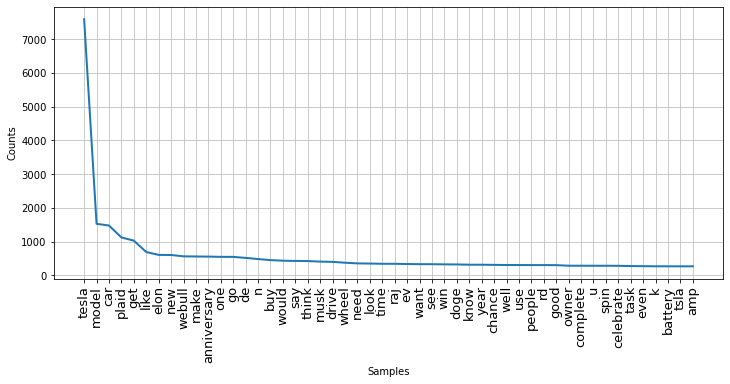

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(50,cumulative=False)

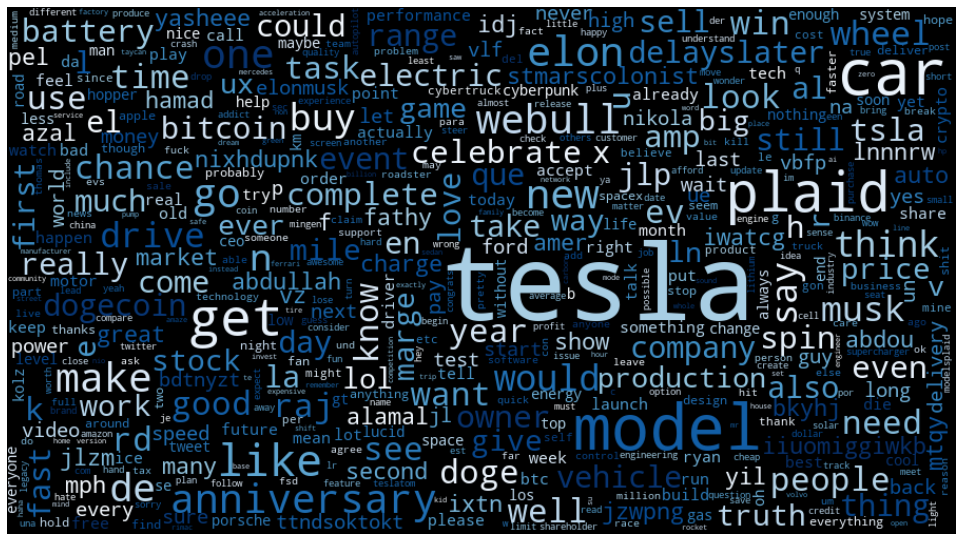

In [24]:

# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# Remove 'tesla, 'tsla', 'q', and '#'

def finish_cleaning(dataframe):
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('tesla',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('tsla',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('musk',''))
    dataframe.clean_tweet = dataframe.clean_tweet.map(lambda x: x.replace('elon',''))

In [26]:
finish_cleaning(tweets)

C:\heejae\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


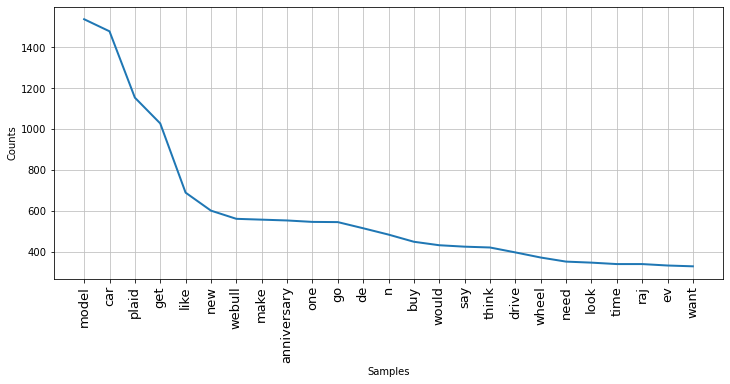

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.clean_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

# Plot word frequency distribution of first few words

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(25,cumulative=False)

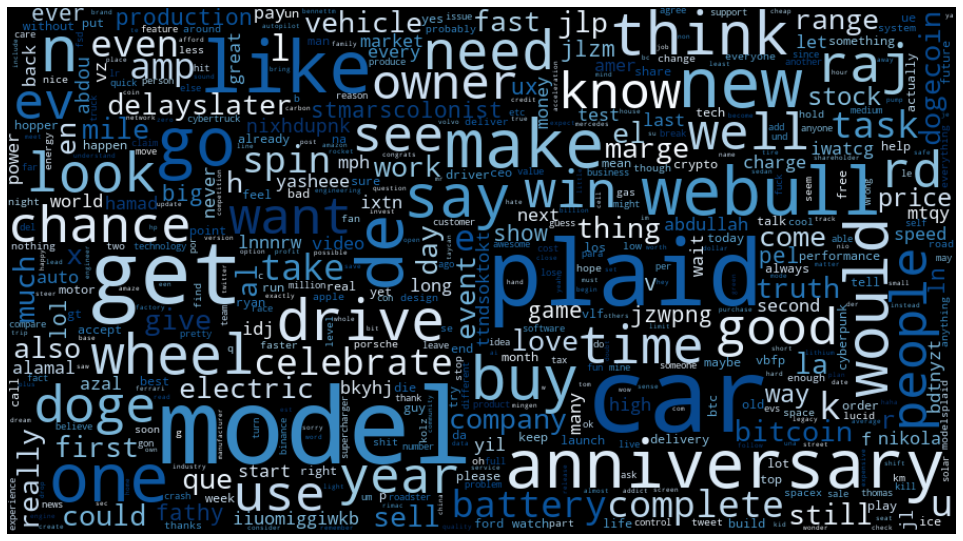

In [28]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
# Find the frequency of each word in the dataframe

word_freq = nltk.FreqDist(all_words_list)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(10)

Word  Count
210        model   1537
60           car   1478
102        plaid   1154
8            get   1028
97          like    690
57           new    602
655       webull    562
138         make    558
657  anniversary    554
58           one    547

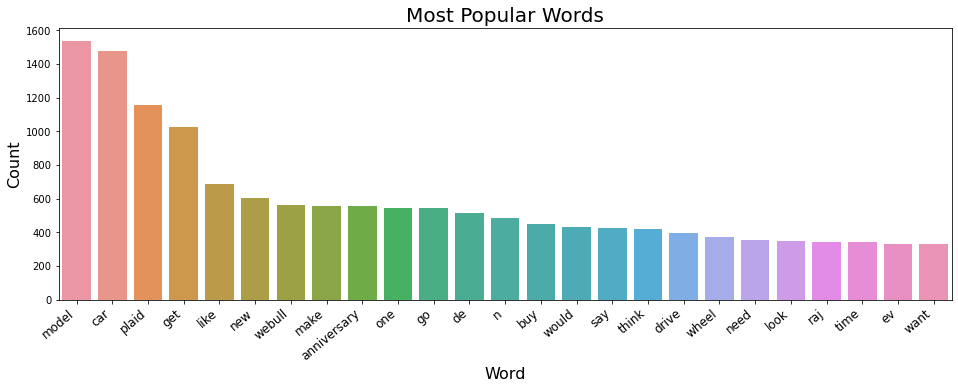

In [30]:
# Plot histogram of most frequent words

freq_df = freq_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count")
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Word', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Most Popular Words", fontsize=20)
plt.show()

In [39]:
filepath = r'./cleaned_tweets.csv'

tweets.to_csv(filepath, header=True)

test = pd.read_csv('cleaned_tweets.csv')
test.head(116)

Unnamed: 0                   id  \
0             0  1403502284361932800   
1             1  1403502273557417986   
2             2  1403502270126428167   
3             3  1403502258617257986   
4             4  1403502246818635776   
..          ...                  ...   
111         111  1403500735199956992   
112         112  1403500727939502090   
113         113  1403500725263536128   
114         114  1403500704564715523   
115         115  1403500696440229894   

                                                 tweet                 date  \
0    @Investments_CEO If only dogecoin were more th...  2021-06-12 08:59:55   
1    @SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...  2021-06-12 08:59:52   
2    @Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...  2021-06-12 08:59:51   
3    Tesla tudo que eu faço essa droga de cena detesta  2021-06-12 08:59:48   
4              Why are used Tesla’s more then new ones  2021-06-12 08:59:46   
..                                                 ...                  ...   
111  @osamah32568005 @Lahnamal @U4h9BdtnyzT05JL @kh...  2021-06-12 08:53:45   
112  @lajzeli1 @SuperSaf @elonmusk @Tesla Which one...  2021-06-12 08:53:43   
113  @Gordonski_7BC @ealmonte0313 @DimaZeniuk @elon...  2021-06-12 08:53:43   
114  @MyolLife @jhall @TeslaOwnersNBay @TeslaGoesPl...  2021-06-12 08:53:38   
115  @NaregHennessy @Tesla @elonmusk  https://t.co/...  2021-06-12 08:53:36   

                                           clean_tweet  
0    ceo dogecoin always question everyone doge des...  
1                                               johnny  
2    bro blue collar worker ever lose battle real q...  
3            tudo que eu fa essa droga de cena detesta  
4                                         use  new one  
..                                                 ...  
111  h bdtnyzt jl azal fathy lnnnrw iwatcg ue vbfp ...  
112                                                one  
113  bc stmarscolonist kolz delayslater truth owner...  
114  highly doubt difference retard soc consumption...  
115                                                NaN  

[116 rows x 5 columns]

In [40]:
len(test)
test.dropna()

Unnamed: 0                   id  \
0               0  1403502284361932800   
1               1  1403502273557417986   
2               2  1403502270126428167   
3               3  1403502258617257986   
4               4  1403502246818635776   
...           ...                  ...   
10043       10043  1403379721744826371   
10044       10044  1403379696037859332   
10045       10045  1403379691847827456   
10047       10047  1403379670381436928   
10048       10048  1403379634121576452   

                                                   tweet                 date  \
0      @Investments_CEO If only dogecoin were more th...  2021-06-12 08:59:55   
1      @SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...  2021-06-12 08:59:52   
2      @Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...  2021-06-12 08:59:51   
3      Tesla tudo que eu faço essa droga de cena detesta  2021-06-12 08:59:48   
4                Why are used Tesla’s more then new ones  2021-06-12 08:59:46   
...                                                  ...                  ...   
10043                               Jveux roule en Tesla  2021-06-12 00:52:53   
10044  @teslaownersSV @28delayslater @elonmusk @Tesla...  2021-06-12 00:52:47   
10045  @DinoGrzanov @WjshewittH @account_kawhi @Crypt...  2021-06-12 00:52:46   
10047          @Tesla nice cock  https://t.co/4ufWrqfrOY  2021-06-12 00:52:41   
10048  Chinese bloggers claim Tesla threatened them w...  2021-06-12 00:52:32   

                                             clean_tweet  
0      ceo dogecoin always question everyone doge des...  
1                                                 johnny  
2      bro blue collar worker ever lose battle real q...  
3              tudo que eu fa essa droga de cena detesta  
4                                           use  new one  
...                                                  ...  
10043                                    jveux roule en   
10044                                    delayslater raj  
10045  kawhi bellai tk lol pay attention  model plaid...  
10047                                          nice cock  
10048    chinese blogger claim  threaten defamation suit  

[9780 rows x 5 columns]

In [44]:
tweets = pd.read_csv('cleaned_tweets.csv', engine='python').drop(['Unnamed: 0'],axis=1)
tweets.head(116)

id                                              tweet  \
0    1403502284361932800  @Investments_CEO If only dogecoin were more th...   
1    1403502273557417986  @SyncSam123 @MonkeyTreeFrog @And6Is9 @Keem_113...   
2    1403502270126428167  @Starbuk99 @WilliamRoark17 @Teslarati @Tesla B...   
3    1403502258617257986  Tesla tudo que eu fa챌o essa droga de cena detesta   
4    1403502246818635776           Why are used Tesla��셲 more then new ones   
..                   ...                                                ...   
111  1403500735199956992  @osamah32568005 @Lahnamal @U4h9BdtnyzT05JL @kh...   
112  1403500727939502090  @lajzeli1 @SuperSaf @elonmusk @Tesla Which one...   
113  1403500725263536128  @Gordonski_7BC @ealmonte0313 @DimaZeniuk @elon...   
114  1403500704564715523  @MyolLife @jhall @TeslaOwnersNBay @TeslaGoesPl...   
115  1403500696440229894  @NaregHennessy @Tesla @elonmusk  https://t.co/...   

                    date                                        clean_tweet  
0    2021-06-12 08:59:55  ceo dogecoin always question everyone doge des...  
1    2021-06-12 08:59:52                                             johnny  
2    2021-06-12 08:59:51  bro blue collar worker ever lose battle real q...  
3    2021-06-12 08:59:48          tudo que eu fa essa droga de cena detesta  
4    2021-06-12 08:59:46                                       use  new one  
..                   ...                                                ...  
111  2021-06-12 08:53:45  h bdtnyzt jl azal fathy lnnnrw iwatcg ue vbfp ...  
112  2021-06-12 08:53:43                                                one  
113  2021-06-12 08:53:43  bc stmarscolonist kolz delayslater truth owner...  
114  2021-06-12 08:53:38  highly doubt difference retard soc consumption...  
115  2021-06-12 08:53:36                                                NaN  

[116 rows x 4 columns]

In [45]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10049 entries, 0 to 10048
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10049 non-null  int64 
 1   tweet        10049 non-null  object
 2   date         10049 non-null  object
 3   clean_tweet  9780 non-null   object
dtypes: int64(1), object(3)
memory usage: 314.2+ KB


In [46]:
tweets.isnull().sum()

id               0
tweet            0
date             0
clean_tweet    269
dtype: int64

In [47]:
tweets = tweets.dropna()

In [48]:
tweets.isnull().sum()

id             0
tweet          0
date           0
clean_tweet    0
dtype: int64

In [138]:
from textblob import TextBlob

head=f'| {"Count":5} | '
head+=f'{"Sentiment Score":15} | '
sept = '| '+ '-'*5 + ' | ' + '-'*15 + ' |'
print(head)
print(sept)

pos_score = 0
neg_score = 0
cnt = 0
# for t in tweets['clean_tweet']:
for t in tweets.clean_tweet:
    blob = TextBlob(t)
    print(f'|{cnt+1:5}  | '+  f'{blob.sentiment[0]:<16.5f}'+ '|')
    if blob.sentiment[0] > 0.2:
        pos_score += 1
    elif blob.sentiment[0] < -0.2:
        neg_score += 1
    cnt +=1

| Count | Sentiment Score | 
| ----- | --------------- |
|    1  | 0.00000         |
|    2  | 0.00000         |
|    3  | 0.28333         |
|    4  | 0.00000         |
|    5  | 0.13636         |
|    6  | -0.20000        |
|    7  | 0.00000         |
|    8  | 0.46818         |
|    9  | -0.37500        |
|   10  | 0.00000         |
|   11  | 0.00000         |
|   12  | 0.10000         |
|   13  | 0.00000         |
|   14  | 0.00000         |
|   15  | 0.00000         |
|   16  | -0.25000        |
|   17  | -0.00556        |
|   18  | 0.00000         |
|   19  | 0.00000         |
|   20  | 0.00000         |
|   21  | 0.50000         |
|   22  | 0.00000         |
|   23  | 0.40000         |
|   24  | -0.05000        |
|   25  | 0.00000         |
|   26  | 0.00000         |
|   27  | 0.27879         |
|   28  | 0.00000         |
|   29  | -0.26250        |
|   30  | 0.00000         |
|   31  | 0.00000         |
|   32  | 0.00000         |
|   33  | 0.00000         |
|   34  | 0.00000  

|  394  | 0.10000         |
|  395  | 0.00000         |
|  396  | 0.00000         |
|  397  | 0.00000         |
|  398  | 0.00000         |
|  399  | 0.20000         |
|  400  | 0.20000         |
|  401  | 0.10000         |
|  402  | 0.00000         |
|  403  | 0.00000         |
|  404  | 0.00000         |
|  405  | 0.00000         |
|  406  | 0.45000         |
|  407  | 0.00000         |
|  408  | 0.00000         |
|  409  | 0.00000         |
|  410  | 0.37500         |
|  411  | 0.00000         |
|  412  | -0.30000        |
|  413  | 0.20000         |
|  414  | 0.00000         |
|  415  | 0.50000         |
|  416  | 0.00000         |
|  417  | 0.35000         |
|  418  | -0.05000        |
|  419  | -0.08807        |
|  420  | 0.50000         |
|  421  | 0.00000         |
|  422  | 0.35000         |
|  423  | 0.50000         |
|  424  | 0.31455         |
|  425  | 0.00000         |
|  426  | 0.00000         |
|  427  | 0.25758         |
|  428  | 0.00000         |
|  429  | 0.00000   

|  987  | 0.50000         |
|  988  | 0.00000         |
|  989  | 0.00000         |
|  990  | 0.00000         |
|  991  | 0.50000         |
|  992  | 0.27879         |
|  993  | 0.30000         |
|  994  | 0.00000         |
|  995  | 0.00000         |
|  996  | 0.00000         |
|  997  | 0.00000         |
|  998  | 0.41667         |
|  999  | 0.37500         |
| 1000  | 0.45000         |
| 1001  | -0.09000        |
| 1002  | 0.07857         |
| 1003  | 0.00000         |
| 1004  | 0.12500         |
| 1005  | 0.20000         |
| 1006  | 0.50000         |
| 1007  | 0.21000         |
| 1008  | 0.50000         |
| 1009  | -0.06944        |
| 1010  | 0.03333         |
| 1011  | 0.24107         |
| 1012  | 0.00000         |
| 1013  | 0.00000         |
| 1014  | 0.08929         |
| 1015  | 0.00000         |
| 1016  | 0.20000         |
| 1017  | 0.11818         |
| 1018  | 0.47500         |
| 1019  | 0.20667         |
| 1020  | 0.53000         |
| 1021  | 0.70000         |
| 1022  | 0.00000   

| 1502  | 0.27333         |
| 1503  | 0.00000         |
| 1504  | 0.21104         |
| 1505  | -0.05000        |
| 1506  | 0.00000         |
| 1507  | 0.06667         |
| 1508  | -0.80000        |
| 1509  | 0.12000         |
| 1510  | 0.35000         |
| 1511  | 0.33333         |
| 1512  | 0.45000         |
| 1513  | 0.12500         |
| 1514  | 0.00000         |
| 1515  | 0.00000         |
| 1516  | 0.01667         |
| 1517  | 0.80000         |
| 1518  | 0.00000         |
| 1519  | 0.37879         |
| 1520  | 0.00000         |
| 1521  | 0.30417         |
| 1522  | 0.00000         |
| 1523  | -0.21000        |
| 1524  | 0.60000         |
| 1525  | 0.00000         |
| 1526  | 0.00000         |
| 1527  | 0.00000         |
| 1528  | 0.00000         |
| 1529  | 0.00000         |
| 1530  | 0.00000         |
| 1531  | 0.00000         |
| 1532  | -0.23000        |
| 1533  | 0.50000         |
| 1534  | 0.00000         |
| 1535  | 0.00000         |
| 1536  | 0.17500         |
| 1537  | 0.00000   

| 2078  | 0.00000         |
| 2079  | 0.40000         |
| 2080  | 0.42500         |
| 2081  | 0.00000         |
| 2082  | 0.00000         |
| 2083  | 0.28571         |
| 2084  | 0.00000         |
| 2085  | 0.00000         |
| 2086  | 0.20000         |
| 2087  | 0.25000         |
| 2088  | 0.20000         |
| 2089  | 0.05556         |
| 2090  | 0.00000         |
| 2091  | 0.20000         |
| 2092  | 0.00000         |
| 2093  | 0.00000         |
| 2094  | 0.02323         |
| 2095  | 0.00000         |
| 2096  | 0.00000         |
| 2097  | 0.00000         |
| 2098  | 0.00000         |
| 2099  | -0.10000        |
| 2100  | 0.50000         |
| 2101  | 0.00000         |
| 2102  | 0.40000         |
| 2103  | -0.50000        |
| 2104  | -0.33571        |
| 2105  | 0.19318         |
| 2106  | 0.06667         |
| 2107  | 0.40000         |
| 2108  | 0.25000         |
| 2109  | 0.00000         |
| 2110  | 0.06667         |
| 2111  | 0.00000         |
| 2112  | 0.00000         |
| 2113  | 0.00000   

| 2982  | 0.13750         |
| 2983  | -0.40000        |
| 2984  | 0.25000         |
| 2985  | 0.00000         |
| 2986  | -0.14583        |
| 2987  | 0.00000         |
| 2988  | 0.02500         |
| 2989  | 0.10000         |
| 2990  | 0.70000         |
| 2991  | 0.06818         |
| 2992  | 0.00000         |
| 2993  | 0.00000         |
| 2994  | 0.00000         |
| 2995  | 0.50000         |
| 2996  | 0.12667         |
| 2997  | 0.20000         |
| 2998  | 0.06190         |
| 2999  | 0.37879         |
| 3000  | 0.20000         |
| 3001  | 0.00000         |
| 3002  | 0.20000         |
| 3003  | 0.00000         |
| 3004  | 0.03409         |
| 3005  | 0.00000         |
| 3006  | -0.07143        |
| 3007  | -0.60000        |
| 3008  | 0.45000         |
| 3009  | 0.20000         |
| 3010  | 0.00000         |
| 3011  | 0.00000         |
| 3012  | 0.00000         |
| 3013  | 0.19545         |
| 3014  | 0.10000         |
| 3015  | -0.09444        |
| 3016  | 0.00000         |
| 3017  | 0.45000   

| 3304  | 0.00000         |
| 3305  | 0.22500         |
| 3306  | -0.80000        |
| 3307  | 0.20000         |
| 3308  | 0.00000         |
| 3309  | 0.00000         |
| 3310  | 0.55000         |
| 3311  | -0.20000        |
| 3312  | 0.00000         |
| 3313  | 0.00000         |
| 3314  | 0.10000         |
| 3315  | 0.00000         |
| 3316  | 0.28333         |
| 3317  | -0.30000        |
| 3318  | 0.35000         |
| 3319  | 0.00000         |
| 3320  | -0.15000        |
| 3321  | 0.00250         |
| 3322  | 0.60000         |
| 3323  | 0.00000         |
| 3324  | -0.10714        |
| 3325  | 0.17099         |
| 3326  | 0.00000         |
| 3327  | -0.40000        |
| 3328  | 0.00000         |
| 3329  | 0.00000         |
| 3330  | 0.02500         |
| 3331  | 0.18000         |
| 3332  | 0.90000         |
| 3333  | 0.00000         |
| 3334  | 0.37500         |
| 3335  | 0.33333         |
| 3336  | 0.00000         |
| 3337  | 0.06818         |
| 3338  | 0.00000         |
| 3339  | 0.40000   

| 3630  | 0.00000         |
| 3631  | 0.00000         |
| 3632  | 0.04545         |
| 3633  | 0.37500         |
| 3634  | -0.13333        |
| 3635  | 0.00000         |
| 3636  | 0.12500         |
| 3637  | 0.00000         |
| 3638  | -0.15000        |
| 3639  | 0.06667         |
| 3640  | 0.65000         |
| 3641  | 0.00000         |
| 3642  | 0.22538         |
| 3643  | 0.00000         |
| 3644  | 0.00000         |
| 3645  | 0.30333         |
| 3646  | 0.00000         |
| 3647  | 0.16212         |
| 3648  | -0.27500        |
| 3649  | 0.00000         |
| 3650  | 0.00000         |
| 3651  | 0.00000         |
| 3652  | 0.80000         |
| 3653  | 0.00000         |
| 3654  | 0.07273         |
| 3655  | 0.00000         |
| 3656  | 0.30000         |
| 3657  | -0.10000        |
| 3658  | -0.25000        |
| 3659  | 0.20000         |
| 3660  | 0.00000         |
| 3661  | -0.17708        |
| 3662  | 0.00000         |
| 3663  | 0.10000         |
| 3664  | 0.00000         |
| 3665  | 0.00000   

| 4148  | 0.50000         |
| 4149  | 0.33333         |
| 4150  | 0.00000         |
| 4151  | 0.00000         |
| 4152  | 0.00000         |
| 4153  | 0.00000         |
| 4154  | 0.00000         |
| 4155  | 0.13636         |
| 4156  | 0.00000         |
| 4157  | 0.00000         |
| 4158  | 0.60000         |
| 4159  | 0.10000         |
| 4160  | 0.00000         |
| 4161  | 0.60000         |
| 4162  | 0.18000         |
| 4163  | 0.50000         |
| 4164  | 0.00000         |
| 4165  | 0.00000         |
| 4166  | 0.13333         |
| 4167  | 0.00000         |
| 4168  | 0.00000         |
| 4169  | 0.50000         |
| 4170  | 0.10000         |
| 4171  | 0.13750         |
| 4172  | 0.70000         |
| 4173  | 0.00000         |
| 4174  | 0.12727         |
| 4175  | 0.00000         |
| 4176  | 0.00000         |
| 4177  | 0.31818         |
| 4178  | 0.70000         |
| 4179  | 0.60000         |
| 4180  | 0.00000         |
| 4181  | 0.00000         |
| 4182  | 0.00000         |
| 4183  | 0.50000   

| 4571  | 0.23750         |
| 4572  | -0.10000        |
| 4573  | 0.40000         |
| 4574  | 0.10417         |
| 4575  | 0.00000         |
| 4576  | 0.25000         |
| 4577  | 0.23750         |
| 4578  | 0.21429         |
| 4579  | 0.00000         |
| 4580  | 0.20000         |
| 4581  | 0.00000         |
| 4582  | 0.25000         |
| 4583  | 0.00000         |
| 4584  | 0.00000         |
| 4585  | 0.00000         |
| 4586  | -0.03333        |
| 4587  | 0.00000         |
| 4588  | 0.00000         |
| 4589  | 0.00000         |
| 4590  | 0.70000         |
| 4591  | 0.00000         |
| 4592  | 0.00000         |
| 4593  | 0.00000         |
| 4594  | 0.00000         |
| 4595  | 0.00000         |
| 4596  | 0.50000         |
| 4597  | 0.00000         |
| 4598  | 0.13212         |
| 4599  | 0.00000         |
| 4600  | -0.27500        |
| 4601  | 0.20000         |
| 4602  | 0.70000         |
| 4603  | 0.00000         |
| 4604  | 0.00000         |
| 4605  | 0.00000         |
| 4606  | 0.70000   

| 5043  | 0.00000         |
| 5044  | 0.00000         |
| 5045  | 0.00000         |
| 5046  | 0.09524         |
| 5047  | 0.00000         |
| 5048  | 0.31250         |
| 5049  | 0.00000         |
| 5050  | 0.00000         |
| 5051  | 0.00000         |
| 5052  | 0.80000         |
| 5053  | -0.02381        |
| 5054  | 0.31000         |
| 5055  | 0.00000         |
| 5056  | 0.00000         |
| 5057  | 0.00000         |
| 5058  | -0.40000        |
| 5059  | 0.00000         |
| 5060  | 0.00000         |
| 5061  | 0.60000         |
| 5062  | 0.45000         |
| 5063  | 0.60000         |
| 5064  | 0.00000         |
| 5065  | 0.13636         |
| 5066  | -0.33750        |
| 5067  | 0.00000         |
| 5068  | 0.19167         |
| 5069  | -0.31875        |
| 5070  | 0.25000         |
| 5071  | 0.23333         |
| 5072  | 0.00000         |
| 5073  | 0.11786         |
| 5074  | -0.05000        |
| 5075  | 0.27750         |
| 5076  | 0.00000         |
| 5077  | 0.00000         |
| 5078  | 0.00000   

| 5461  | 0.65000         |
| 5462  | 0.00000         |
| 5463  | 0.00000         |
| 5464  | -0.25000        |
| 5465  | 0.30000         |
| 5466  | 0.00000         |
| 5467  | 0.10000         |
| 5468  | -0.40000        |
| 5469  | 0.00000         |
| 5470  | 0.00000         |
| 5471  | 0.20000         |
| 5472  | -0.01250        |
| 5473  | 0.00000         |
| 5474  | 0.00000         |
| 5475  | 0.00000         |
| 5476  | 0.30833         |
| 5477  | 0.00000         |
| 5478  | 0.40000         |
| 5479  | 0.00000         |
| 5480  | 0.00000         |
| 5481  | 0.00000         |
| 5482  | -0.80000        |
| 5483  | 0.00000         |
| 5484  | 0.00000         |
| 5485  | 0.00000         |
| 5486  | -0.50000        |
| 5487  | -0.29167        |
| 5488  | 0.00000         |
| 5489  | -0.25000        |
| 5490  | 0.21111         |
| 5491  | 0.28750         |
| 5492  | 0.50000         |
| 5493  | 0.00000         |
| 5494  | -0.20000        |
| 5495  | 0.40000         |
| 5496  | 0.07500   

| 5867  | 0.00000         |
| 5868  | 0.70000         |
| 5869  | 0.00000         |
| 5870  | 0.00000         |
| 5871  | 0.21667         |
| 5872  | 0.00000         |
| 5873  | 0.00000         |
| 5874  | -0.40000        |
| 5875  | 0.22090         |
| 5876  | 0.10000         |
| 5877  | 0.00000         |
| 5878  | 0.00000         |
| 5879  | 0.00000         |
| 5880  | -0.07778        |
| 5881  | 0.50000         |
| 5882  | 0.13636         |
| 5883  | 0.00000         |
| 5884  | 0.00000         |
| 5885  | 0.20000         |
| 5886  | 0.13636         |
| 5887  | 0.00000         |
| 5888  | 0.20000         |
| 5889  | -0.80000        |
| 5890  | 0.00000         |
| 5891  | 0.13636         |
| 5892  | 0.00000         |
| 5893  | 0.20000         |
| 5894  | 0.00000         |
| 5895  | -0.11310        |
| 5896  | 0.00000         |
| 5897  | 0.00000         |
| 5898  | 0.06818         |
| 5899  | 0.00000         |
| 5900  | 0.20000         |
| 5901  | 0.00000         |
| 5902  | 0.10417   

| 6326  | 0.29333         |
| 6327  | 0.45000         |
| 6328  | 0.11000         |
| 6329  | 0.00000         |
| 6330  | 0.00000         |
| 6331  | 0.00000         |
| 6332  | 0.10381         |
| 6333  | 0.00000         |
| 6334  | 0.00000         |
| 6335  | 0.13636         |
| 6336  | 0.60000         |
| 6337  | 0.20000         |
| 6338  | 0.26667         |
| 6339  | 0.00000         |
| 6340  | -0.33333        |
| 6341  | 0.00000         |
| 6342  | 0.00000         |
| 6343  | 0.00000         |
| 6344  | 0.30000         |
| 6345  | 0.00000         |
| 6346  | 0.33333         |
| 6347  | 0.10000         |
| 6348  | 0.32500         |
| 6349  | 0.10000         |
| 6350  | 0.03000         |
| 6351  | -0.02857        |
| 6352  | 0.45000         |
| 6353  | -0.02292        |
| 6354  | 0.06629         |
| 6355  | 0.00000         |
| 6356  | 0.00000         |
| 6357  | 0.00000         |
| 6358  | 0.00000         |
| 6359  | 0.00000         |
| 6360  | 0.00000         |
| 6361  | 0.00000   

| 6801  | -0.60000        |
| 6802  | 0.00000         |
| 6803  | 0.16500         |
| 6804  | -0.15000        |
| 6805  | 0.00000         |
| 6806  | 0.00000         |
| 6807  | 0.20000         |
| 6808  | 0.00000         |
| 6809  | -0.09286        |
| 6810  | 0.00000         |
| 6811  | 0.00000         |
| 6812  | -0.16667        |
| 6813  | -0.07500        |
| 6814  | 0.00000         |
| 6815  | 0.00000         |
| 6816  | 0.00000         |
| 6817  | 0.00000         |
| 6818  | 0.00000         |
| 6819  | -0.50000        |
| 6820  | 0.35714         |
| 6821  | 0.00000         |
| 6822  | 0.20000         |
| 6823  | -0.15000        |
| 6824  | 0.00000         |
| 6825  | -0.25000        |
| 6826  | 0.16818         |
| 6827  | 0.21667         |
| 6828  | 0.00000         |
| 6829  | 0.10000         |
| 6830  | 0.00000         |
| 6831  | 0.00000         |
| 6832  | -0.30000        |
| 6833  | 0.00000         |
| 6834  | 0.00000         |
| 6835  | 0.13636         |
| 6836  | -0.07500  

| 7337  | 0.00000         |
| 7338  | 0.00000         |
| 7339  | 0.00000         |
| 7340  | 0.10000         |
| 7341  | 0.25000         |
| 7342  | -0.00338        |
| 7343  | 0.15000         |
| 7344  | 0.58333         |
| 7345  | 0.00000         |
| 7346  | 0.13636         |
| 7347  | 0.13636         |
| 7348  | 0.13636         |
| 7349  | 0.00000         |
| 7350  | 0.15000         |
| 7351  | -0.17292        |
| 7352  | -0.40833        |
| 7353  | 0.30556         |
| 7354  | 0.61667         |
| 7355  | 0.00000         |
| 7356  | 0.00000         |
| 7357  | 0.00000         |
| 7358  | 0.35000         |
| 7359  | 0.00000         |
| 7360  | 0.00000         |
| 7361  | 0.09659         |
| 7362  | 0.00000         |
| 7363  | 0.26818         |
| 7364  | 0.00000         |
| 7365  | 0.13636         |
| 7366  | 0.00000         |
| 7367  | -0.50000        |
| 7368  | 0.00000         |
| 7369  | 0.00000         |
| 7370  | 0.15000         |
| 7371  | -0.05625        |
| 7372  | 0.00000   

| 7754  | 0.00000         |
| 7755  | 0.57857         |
| 7756  | 0.00000         |
| 7757  | 0.57500         |
| 7758  | 0.80000         |
| 7759  | 0.60000         |
| 7760  | -0.07083        |
| 7761  | 0.85000         |
| 7762  | 0.00000         |
| 7763  | 0.13636         |
| 7764  | 0.00000         |
| 7765  | 0.00000         |
| 7766  | -0.23333        |
| 7767  | -0.43333        |
| 7768  | 0.50000         |
| 7769  | -0.22500        |
| 7770  | 0.00000         |
| 7771  | 0.00000         |
| 7772  | 0.00000         |
| 7773  | 1.00000         |
| 7774  | 0.13636         |
| 7775  | 0.35000         |
| 7776  | 0.00000         |
| 7777  | 0.00000         |
| 7778  | 0.00000         |
| 7779  | 0.26786         |
| 7780  | 0.00000         |
| 7781  | 0.45000         |
| 7782  | 0.50000         |
| 7783  | 0.00000         |
| 7784  | 0.00000         |
| 7785  | 0.00000         |
| 7786  | 0.00000         |
| 7787  | 0.00000         |
| 7788  | 0.70000         |
| 7789  | 0.00000   

| 8198  | -0.01278        |
| 8199  | 0.00000         |
| 8200  | 0.00000         |
| 8201  | 0.45000         |
| 8202  | 1.00000         |
| 8203  | -0.38667        |
| 8204  | 0.10000         |
| 8205  | -0.08333        |
| 8206  | 0.23485         |
| 8207  | -0.13889        |
| 8208  | -0.60000        |
| 8209  | 0.40000         |
| 8210  | 0.06818         |
| 8211  | 0.00000         |
| 8212  | -0.40000        |
| 8213  | 0.00000         |
| 8214  | 0.00000         |
| 8215  | -0.10000        |
| 8216  | 0.00000         |
| 8217  | -0.05000        |
| 8218  | -0.10000        |
| 8219  | 0.36667         |
| 8220  | 0.00000         |
| 8221  | 0.06818         |
| 8222  | 0.00000         |
| 8223  | 0.05000         |
| 8224  | 0.31818         |
| 8225  | -0.75000        |
| 8226  | 0.60000         |
| 8227  | 0.00000         |
| 8228  | 0.10000         |
| 8229  | -0.03333        |
| 8230  | -0.02500        |
| 8231  | 0.10727         |
| 8232  | 0.62500         |
| 8233  | 0.35000   

| 8798  | 0.00000         |
| 8799  | 0.00000         |
| 8800  | 0.00000         |
| 8801  | -0.30000        |
| 8802  | 0.00000         |
| 8803  | -0.05556        |
| 8804  | 0.00000         |
| 8805  | 0.00000         |
| 8806  | -0.80000        |
| 8807  | 0.03333         |
| 8808  | 0.10714         |
| 8809  | 0.51364         |
| 8810  | 0.45000         |
| 8811  | 0.45000         |
| 8812  | 0.00000         |
| 8813  | 0.45000         |
| 8814  | 0.00000         |
| 8815  | 0.63333         |
| 8816  | 0.13636         |
| 8817  | 0.00000         |
| 8818  | -0.08333        |
| 8819  | 0.10000         |
| 8820  | 0.00000         |
| 8821  | -0.40000        |
| 8822  | 0.00000         |
| 8823  | 0.00000         |
| 8824  | 0.00000         |
| 8825  | 0.00000         |
| 8826  | -0.10000        |
| 8827  | 0.11667         |
| 8828  | 0.00000         |
| 8829  | -0.50000        |
| 8830  | 0.00000         |
| 8831  | 0.00000         |
| 8832  | 0.20000         |
| 8833  | 0.13636   

| 9412  | 0.45000         |
| 9413  | 0.50000         |
| 9414  | 0.45000         |
| 9415  | -0.18182        |
| 9416  | -0.40000        |
| 9417  | 0.02500         |
| 9418  | 0.45000         |
| 9419  | 0.00000         |
| 9420  | 0.00000         |
| 9421  | 0.15833         |
| 9422  | -0.02500        |
| 9423  | 0.00000         |
| 9424  | 0.45000         |
| 9425  | 0.00000         |
| 9426  | 0.45000         |
| 9427  | 0.00000         |
| 9428  | 0.23990         |
| 9429  | 0.45000         |
| 9430  | 0.00000         |
| 9431  | 0.45000         |
| 9432  | 0.30000         |
| 9433  | -0.02500        |
| 9434  | 0.40000         |
| 9435  | 0.50000         |
| 9436  | 0.45000         |
| 9437  | 0.45000         |
| 9438  | 0.20000         |
| 9439  | 0.45000         |
| 9440  | 0.45000         |
| 9441  | 0.45000         |
| 9442  | -0.02500        |
| 9443  | 0.00000         |
| 9444  | 0.80000         |
| 9445  | -0.30000        |
| 9446  | 0.45000         |
| 9447  | 0.00000   

In [139]:
print(pos_score)

neg_score

2265


622

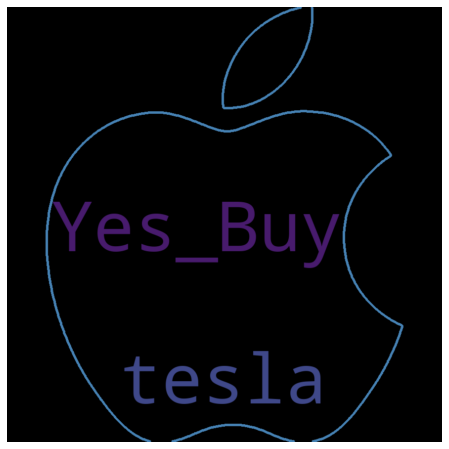

In [129]:
# Word Cloud with recommendation
# text = "Not_Buy tesla"
import numpy as np
from PIL import Image
if pos_score/neg_score > 3:
    text = "Yes_Buy tesla"
else:
    text = "Not_Buy"

custom_mask = np.array(Image.open("./Downloads/apple.png"))
for i in range(len(custom_mask)):
    for j in range(len(custom_mask[i])):
        if custom_mask[i][j] == 1:
            custom_mask[i][j] = 255

wc = WordCloud(max_font_size=150,
               width=700,height=700,contour_width=5, contour_color='steelblue',mask=custom_mask)
wordcloud = wc.generate_from_text(text)

# wordcloud = wordcloud.generate_from_text(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()